Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
### Input date for analysis
from datetime import datetime
#
anltdate=datetime.today().strftime('%Y-%m-%d')
print(anltdate)
#anltdate="2020-12-11"
configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_new_cases',FloatType(),True),
       StructField('delta_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_new_cases', 'delta_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

2020-12-19
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_new_cases|delta_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+-------

In [2]:
#sc.stop()
#exit()

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [3]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
from datetime import datetime
#
anltdate=datetime.today().strftime('%Y-%m-%d')
print(anltdate)
configs = {"analytics_date":anltdate,"a":1}
#
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

2020-12-19
root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [4]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
anltdate=datetime.today().strftime('%Y-%m-%d')
print(anltdate)
configs = {"analytics_date":anltdate,"a":1}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

2020-12-19


### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [5]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2020-12-19  Afghanistan_nan         0         243.0         669.0   
1  2020-12-19      Albania_nan         0         580.0        2004.0   
2  2020-12-19      Algeria_nan         0         438.0        1306.0   
3  2020-12-19      Andorra_nan         0          53.0         137.0   
4  2020-12-19       Angola_nan         0          78.0         200.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0        1505.0              49621.0               49804.0  35530000.0   
1        5141.0              52004.0               52834.0   2878445.0   
2        3250.0              94371.0               94862.0  41320000.0   
3         283.0               7519.0                7552.0     77239.0   
4         501.0              16562.0               16641.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001397   
1                                       0.018067   
2                                       0.002284   
3                                       0.097359   
4                                       0.000504   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.013966                    183.0   
1                                           0.180670                    830.0   
2                                           0.022839                    491.0   
3                                           0.973589                     33.0   
4                                           0.005040                     79.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    5.150577             215.000000   
1                  288.350128             734.428589   
2                   11.882866             464.285706   
3                  427.245300              40.428570   
4                    2.403680              71.571426   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           8.471714      
1                                         357.206757      
2                                          15.730881      
3                                         732.790405      
4                                           3.048718

In [6]:
%%sql_display
select * from covid19_jh_analysis where region is not null and date >= {analytics_date} order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [7]:
print(configs)

{'analytics_date': '2020-12-19', 'a': 1}


In [8]:
%%sql_display
select * from covid19_jh_analysis where region is not null and date >= {a} order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +10 cases a day AVG last 7days 

In [9]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-19' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10
order by delta_roling_7day_AVG desc, region asc
limit 60

date                    region  delta_roling_7day_AVG  \
0   2020-12-19         United States_nan          219324.281250   
1   2020-12-19                Brazil_nan           46678.714844   
2   2020-12-19                Turkey_nan           28773.857422   
3   2020-12-19                Russia_nan           27217.714844   
4   2020-12-19                 India_nan           25403.427734   
5   2020-12-19               Germany_nan           24647.142578   
6   2020-12-19        United Kingdom_nan           23958.857422   
7   2020-12-19                 Italy_nan           16557.857422   
8   2020-12-19                France_nan           12973.428711   
9   2020-12-19               Ukraine_nan           10734.000000   
10  2020-12-19              Colombia_nan           10451.857422   
11  2020-12-19                Mexico_nan           10309.571289   
12  2020-12-19           Netherlands_nan            9990.428711   
13  2020-12-19                Poland_nan            9666.142578   
14  2020-12-19                 Spain_nan            9523.000000   
15  2020-12-19          South Africa_nan            8065.000000   
16  2020-12-19                  Iran_nan            7606.285645   
17  2020-12-19                Sweden_nan            6717.428711   
18  2020-12-19             Indonesia_nan            6422.000000   
19  2020-12-19             Argentina_nan            6006.571289   
20  2020-12-19               Czechia_nan            5828.714355   
21  2020-12-19               Romania_nan            5317.000000   
22  2020-12-19                Serbia_nan            5268.856934   
23  2020-12-19           Switzerland_nan            4308.285645   
24  2020-12-19            Azerbaijan_nan            4038.142822   
25  2020-12-19              Portugal_nan            3809.285645   
26  2020-12-19               Hungary_nan            3539.571533   
27  2020-12-19               Denmark_nan            3536.714355   
28  2020-12-19               Croatia_nan            3121.000000   
29  2020-12-19               Georgia_nan            2986.285645   
30  2020-12-19               Belgium_nan            2948.857178   
31  2020-12-19              Pakistan_nan            2802.428467   
32  2020-12-19             Lithuania_nan            2751.571533   
33  2020-12-19              Slovakia_nan            2719.571533   
34  2020-12-19                Panama_nan            2647.285645   
35  2020-12-19                 Japan_nan            2634.714355   
36  2020-12-19               Austria_nan            2618.857178   
37  2020-12-19               Morocco_nan            2547.000000   
38  2020-12-19                Israel_nan            2411.857178   
39  2020-12-19                Jordan_nan            2293.571533   
40  2020-12-19            Canada_Ontario            2122.857178   
41  2020-12-19               Belarus_nan            1898.428589   
42  2020-12-19                 Chile_nan            1880.142822   
43  2020-12-19    West Bank and Gaza_nan            1855.714233   
44  2020-12-19             Canada_Quebec            1825.428589   
45  2020-12-19              Bulgaria_nan            1766.000000   
46  2020-12-19               Lebanon_nan            1605.571411   
47  2020-12-19            Canada_Alberta            1541.285767   
48  2020-12-19              Malaysia_nan            1501.000000   
49  2020-12-19            Bangladesh_nan            1492.000000   
50  2020-12-19                  Peru_nan            1478.000000   
51  2020-12-19              Slovenia_nan            1402.571411   
52  2020-12-19           Philippines_nan            1360.428589   
53  2020-12-19                  Iraq_nan            1315.857178   
54  2020-12-19               Moldova_nan            1299.428589   
55  2020-12-19  United Arab Emirates_nan            1221.285767   
56  2020-12-19               Tunisia_nan            1211.142822   
57  2020-12-19                 Burma_nan            1190.714233   
58  2020-12-19                Greece_nan             990.

In [10]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-19' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2020-12-19           United States_nan          219324.281250   
1   2020-12-19                  Brazil_nan           46678.714844   
2   2020-12-19                  Turkey_nan           28773.857422   
3   2020-12-19                  Russia_nan           27217.714844   
4   2020-12-19                 Germany_nan           24647.142578   
5   2020-12-19          United Kingdom_nan           23958.857422   
6   2020-12-19                   Italy_nan           16557.857422   
7   2020-12-19                  France_nan           12973.428711   
8   2020-12-19                 Ukraine_nan           10734.000000   
9   2020-12-19                Colombia_nan           10451.857422   
10  2020-12-19                  Mexico_nan           10309.571289   
11  2020-12-19             Netherlands_nan            9990.428711   
12  2020-12-19                  Poland_nan            9666.142578   
13  2020-12-19                   Spain_nan            9523.000000   
14  2020-12-19            South Africa_nan            8065.000000   
15  2020-12-19                    Iran_nan            7606.285645   
16  2020-12-19                  Sweden_nan            6717.428711   
17  2020-12-19               Argentina_nan            6006.571289   
18  2020-12-19                 Czechia_nan            5828.714355   
19  2020-12-19                 Romania_nan            5317.000000   
20  2020-12-19                  Serbia_nan            5268.856934   
21  2020-12-19             Switzerland_nan            4308.285645   
22  2020-12-19              Azerbaijan_nan            4038.142822   
23  2020-12-19                Portugal_nan            3809.285645   
24  2020-12-19                 Hungary_nan            3539.571533   
25  2020-12-19                 Denmark_nan            3536.714355   
26  2020-12-19                 Croatia_nan            3121.000000   
27  2020-12-19                 Georgia_nan            2986.285645   
28  2020-12-19                 Belgium_nan            2948.857178   
29  2020-12-19               Lithuania_nan            2751.571533   
..         ...                         ...                    ...   
42  2020-12-19                 Lebanon_nan            1605.571411   
43  2020-12-19              Canada_Alberta            1541.285767   
44  2020-12-19                Slovenia_nan            1402.571411   
45  2020-12-19                 Moldova_nan            1299.428589   
46  2020-12-19    United Arab Emirates_nan            1221.285767   
47  2020-12-19                 Tunisia_nan            1211.142822   
48  2020-12-19                  Greece_nan             990.857117   
49  2020-12-19              Costa Rica_nan             932.142883   
50  2020-12-19                Paraguay_nan             883.285706   
51  2020-12-19                 Armenia_nan             848.000000   
52  2020-12-19      Dominican Republic_nan             782.428589   
53  2020-12-19  Bosnia and Herzegovina_nan             762.571411   
54  2020-12-19                 Albania_nan             734.428589   
55  2020-12-19         North Macedonia_nan             727.142883   
56  2020-12-19                  Latvia_nan             720.142883   
57  2020-12-19     Canada_British Columbia             657.571411   
58  2020-12-19                   Libya_nan             556.000000   
59  2020-12-19                 Estonia_nan             528.857117   
60  2020-12-19                 Uruguay_nan             443.000000   
61  2020-12-19                  Cyprus_nan             428.285706   
62  2020-12-19              Luxembourg_nan             424.714294   
63  2020-12-19              Montenegro_nan             406.285706   
64  2020-12-19                  Norway_nan             395.428558   
65  2020-12-19                 Ireland_nan             392.428558   
66  2020-12-19                  Kosovo_nan             391.857147   
67  2020-12-19                 Finland_nan             358.428558   
68  2020

### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [11]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-19' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                      region  delta_roling_7day_AVG  \
0   2020-12-19           United States_nan          219324.281250   
1   2020-12-19                  Brazil_nan           46678.714844   
2   2020-12-19                  Turkey_nan           28773.857422   
3   2020-12-19                  Russia_nan           27217.714844   
4   2020-12-19                 Germany_nan           24647.142578   
5   2020-12-19          United Kingdom_nan           23958.857422   
6   2020-12-19                   Italy_nan           16557.857422   
7   2020-12-19                  France_nan           12973.428711   
8   2020-12-19                 Ukraine_nan           10734.000000   
9   2020-12-19                Colombia_nan           10451.857422   
10  2020-12-19             Netherlands_nan            9990.428711   
11  2020-12-19                  Poland_nan            9666.142578   
12  2020-12-19                   Spain_nan            9523.000000   
13  2020-12-19                  Sweden_nan            6717.428711   
14  2020-12-19                 Czechia_nan            5828.714355   
15  2020-12-19                 Romania_nan            5317.000000   
16  2020-12-19                  Serbia_nan            5268.856934   
17  2020-12-19             Switzerland_nan            4308.285645   
18  2020-12-19              Azerbaijan_nan            4038.142822   
19  2020-12-19                Portugal_nan            3809.285645   
20  2020-12-19                 Hungary_nan            3539.571533   
21  2020-12-19                 Denmark_nan            3536.714355   
22  2020-12-19                 Croatia_nan            3121.000000   
23  2020-12-19                 Georgia_nan            2986.285645   
24  2020-12-19                 Belgium_nan            2948.857178   
25  2020-12-19               Lithuania_nan            2751.571533   
26  2020-12-19                Slovakia_nan            2719.571533   
27  2020-12-19                  Panama_nan            2647.285645   
28  2020-12-19                 Austria_nan            2618.857178   
29  2020-12-19                  Israel_nan            2411.857178   
30  2020-12-19                  Jordan_nan            2293.571533   
31  2020-12-19                 Belarus_nan            1898.428589   
32  2020-12-19      West Bank and Gaza_nan            1855.714233   
33  2020-12-19               Canada_Quebec            1825.428589   
34  2020-12-19                Bulgaria_nan            1766.000000   
35  2020-12-19                 Lebanon_nan            1605.571411   
36  2020-12-19              Canada_Alberta            1541.285767   
37  2020-12-19                Slovenia_nan            1402.571411   
38  2020-12-19                 Moldova_nan            1299.428589   
39  2020-12-19              Costa Rica_nan             932.142883   
40  2020-12-19                 Armenia_nan             848.000000   
41  2020-12-19  Bosnia and Herzegovina_nan             762.571411   
42  2020-12-19                 Albania_nan             734.428589   
43  2020-12-19         North Macedonia_nan             727.142883   
44  2020-12-19                  Latvia_nan             720.142883   
45  2020-12-19                 Estonia_nan             528.857117   
46  2020-12-19                  Cyprus_nan             428.285706   
47  2020-12-19              Luxembourg_nan             424.714294   
48  2020-12-19              Montenegro_nan             406.285706   
49  2020-12-19                  Kosovo_nan             391.857147   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          927.648132          249709.0   
1                                          307.444977           52544.0   
2                                          498.495239           26410.0   
3                                          263.701050           28116.0   
4                                          416.789459           32830.0   
5                                       

### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-19' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                    region  delta_roling_7day_AVG  \
0   2020-12-19          South Africa_nan            8065.000000   
1   2020-12-19                  Iran_nan            7606.285645   
2   2020-12-19             Argentina_nan            6006.571289   
3   2020-12-19            Canada_Ontario            2122.857178   
4   2020-12-19                 Chile_nan            1880.142822   
5   2020-12-19  United Arab Emirates_nan            1221.285767   
6   2020-12-19               Tunisia_nan            1211.142822   
7   2020-12-19                Greece_nan             990.857117   
8   2020-12-19              Paraguay_nan             883.285706   
9   2020-12-19   Canada_British Columbia             657.571411   
10  2020-12-19               Uruguay_nan             443.000000   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          190.891846            8725.0   
1                                          126.781990            7121.0   
2                                          186.429062            7002.0   
3                                          203.980789            2282.0   
4                                          137.948654            2403.0   
5                                          181.893616            1284.0   
6                                          143.792786            1616.0   
7                                          129.162018             874.0   
8                                          173.883652            1268.0   
9                                          180.509811             624.0   
10                                         178.672775             514.0   

    3_day_change  7_day_change  confirmed_yesterday  population  \
0        27859.0       56455.0             901538.0  59148672.0   
1        22177.0       53244.0            1145651.0  83993000.0   
2        21171.0       42046.0            1531374.0  45106700.0   
3         6947.0       14860.0             155180.0  14570000.0   
4         5806.0       13161.0             581135.0  19081012.0   
5         3883.0        8549.0             191150.0   9400000.0   
6         4341.0        8478.0             117582.0  11791968.0   
7         3212.0        6936.0             129584.0  10740000.0   
8         2943.0        6183.0              98296.0   7111652.0   
9         1937.0        4603.0              45400.0   5100000.0   
10        1532.0        3101.0              11950.0   3471150.0   

    population_percentage_factor_9a10_infected_rate_confirmed  \
0                                            0.152419           
1                                            0.136399           
2                                            0.339501           
3                                            0.106507           
4                                            0.304562           
5                                            0.203352           
6                                            0.099714           
7                                            0.120656           
8                                            0.138220           
9                                            0.089022           
10                                           0.034430           

    delta_new_cases  delta_new_cases_per_1M_hab  
0            7372.0                  124.635086  
1            8153.0                   97.067612  
2            5236.0                  116.080315  
3            1919.0                  131.708984  
4            1464.0                   76.725487  
5            1157.0                  123.085106  
6             874.0                   74.118248  
7            1088.0                  101.303535  
8             685.0                   96.320801  
9             788.0                  154.509811  
10            363.0                  104.576294

### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [13]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-19' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

date                  region  delta_roling_7day_AVG  \
0  2020-12-19              Mexico_nan           10309.571289   
1  2020-12-19             Morocco_nan            2547.000000   
2  2020-12-19  Dominican Republic_nan             782.428589   
3  2020-12-19               Libya_nan             556.000000   
4  2020-12-19              Norway_nan             395.428558   
5  2020-12-19             Ireland_nan             392.428558   
6  2020-12-19             Finland_nan             358.428558   
7  2020-12-19              Kuwait_nan             248.857147   

   delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                         112.199242           12248.0   
1                                          96.851662            2647.0   
2                                         101.196419             624.0   
3                                         113.282913             489.0   
4                                         103.341423             431.0   
5                                         111.533440             576.0   
6                                          91.021225             354.0   
7                                          84.215614             339.0   

   3_day_change  7_day_change  confirmed_yesterday   population  \
0       34344.0       72167.0            1301546.0  128640792.0   
1        8774.0       17829.0             412393.0   36817128.0   
2        2132.0        5477.0             157929.0   10824494.0   
3        1755.0        3892.0              93772.0    6871292.0   
4        1355.0        2768.0              43207.0    5357000.0   
5        1478.0        2747.0              78254.0    4925877.0   
6        1123.0        2509.0              32582.0    5513000.0   
7         821.0        1742.0             147531.0    4137000.0   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.101177                   8937.0   
1                                           0.112011                   2438.0   
2                                           0.145901                    896.0   
3                                           0.136471                    626.0   
4                                           0.080657                    372.0   
5                                           0.158865                    235.0   
6                                           0.059102                    411.0   
7                                           0.356616                    208.0   

   delta_new_cases_per_1M_hab  
0                   69.472519  
1                   66.219177  
2                   82.775230  
3                   91.103683  
4                   69.441849  
5                   47.707241  
6                   74.551064  
7                   50.277981

### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [14]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-19' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2020-12-19                    Oman_nan             192.857147   
1   2020-12-19            Burkina Faso_nan             179.000000   
2   2020-12-19            Saudi Arabia_nan             158.142853   
3   2020-12-19                   Qatar_nan             148.000000   
4   2020-12-19                   Syria_nan             145.285721   
5   2020-12-19                   Ghana_nan             130.714279   
6   2020-12-19                Zimbabwe_nan             126.428574   
7   2020-12-19              Uzbekistan_nan             123.428574   
8   2020-12-19                 Senegal_nan              95.142860   
9   2020-12-19              Mozambique_nan              94.000000   
10  2020-12-19                    Cuba_nan              89.428574   
11  2020-12-19             China_Hong Kong              84.571426   
12  2020-12-19                 Jamaica_nan              75.714287   
13  2020-12-19                Botswana_nan              73.285713   
14  2020-12-19                  Angola_nan              71.571426   
15  2020-12-19                    Mali_nan              67.285713   
16  2020-12-19                   Niger_nan              57.142857   
17  2020-12-19                Cameroon_nan              55.000000   
18  2020-12-19              France_Reunion              34.714287   
19  2020-12-19           Cote d'Ivoire_nan              32.428570   
20  2020-12-19                Thailand_nan              19.857143   
21  2020-12-19               Singapore_nan              11.571428   
22  2020-12-19   Australia_New South Wales              10.428572   
23  2020-12-19                 Iceland_nan               9.285714   
24  2020-12-19               Nicaragua_nan               7.285714   
25  2020-12-19           France_Martinique               6.857143   
26  2020-12-19              China_Shanghai               5.857143   
27  2020-12-19                 Taiwan*_nan               4.857143   
28  2020-12-19                 Vietnam_nan               2.714286   
29  2020-12-19             New Zealand_nan               2.571429   
30  2020-12-19               China_Sichuan               1.857143   
31  2020-12-19             China_Guangdong               1.714286   
32  2020-12-19          China_Heilongjiang               1.285714   
33  2020-12-19               China_Beijing               1.000000   
34  2020-12-19        Australia_Queensland               0.857143   
35  2020-12-19                Cambodia_nan               0.714286   
36  2020-12-19        China_Inner Mongolia               0.714286   
37  2020-12-19          Australia_Victoria               0.571429   
38  2020-12-19              China_Shandong               0.571429   
39  2020-12-19                China_Yunnan               0.571429   
40  2020-12-19  United Kingdom_Isle of Man               0.428571   
41  2020-12-19                China_Fujian               0.285714   
42  2020-12-19               China_Tianjin               0.285714   
43  2020-12-19              China_Zhejiang               0.285714   
44  2020-12-19   Australia_South Australia               0.142857   
45  2020-12-19                 China_Henan               0.142857   
46  2020-12-19               China_Jiangsu               0.142857   
47  2020-12-19              China_Liaoning               0.142857   
48  2020-12-19                China_Shanxi               0.142857   
49  2020-12-19                 China_Anhui               0.000000   
50  2020-12-19             China_Chongqing               0.000000   
51  2020-12-19                 China_Gansu               0.000000   
52  2020-12-19               China_Guangxi               0.000000   
53  2020-12-19               China_Guizhou               0.000000   
54  2020-12-19                China_Hainan               0.000000   
55  2020-12-19                 China_Hebei               0.000000   
56  2020-12-19                 China_Hubei               0.000000   
57  2020

In [15]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-19' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2020-12-19                    Oman_nan             192.857147   
1   2020-12-19            Burkina Faso_nan             179.000000   
2   2020-12-19            Saudi Arabia_nan             158.142853   
3   2020-12-19                   Qatar_nan             148.000000   
4   2020-12-19                   Syria_nan             145.285721   
5   2020-12-19                   Ghana_nan             130.714279   
6   2020-12-19                Zimbabwe_nan             126.428574   
7   2020-12-19              Uzbekistan_nan             123.428574   
8   2020-12-19                 Senegal_nan              95.142860   
9   2020-12-19              Mozambique_nan              94.000000   
10  2020-12-19                    Cuba_nan              89.428574   
11  2020-12-19             China_Hong Kong              84.571426   
12  2020-12-19                 Jamaica_nan              75.714287   
13  2020-12-19                Botswana_nan              73.285713   
14  2020-12-19                  Angola_nan              71.571426   
15  2020-12-19                    Mali_nan              67.285713   
16  2020-12-19                   Niger_nan              57.142857   
17  2020-12-19                Cameroon_nan              55.000000   
18  2020-12-19              France_Reunion              34.714287   
19  2020-12-19           Cote d'Ivoire_nan              32.428570   
20  2020-12-19                Thailand_nan              19.857143   
21  2020-12-19               Singapore_nan              11.571428   
22  2020-12-19   Australia_New South Wales              10.428572   
23  2020-12-19                 Iceland_nan               9.285714   
24  2020-12-19               Nicaragua_nan               7.285714   
25  2020-12-19           France_Martinique               6.857143   
26  2020-12-19              China_Shanghai               5.857143   
27  2020-12-19                 Taiwan*_nan               4.857143   
28  2020-12-19                 Vietnam_nan               2.714286   
29  2020-12-19             New Zealand_nan               2.571429   
..         ...                         ...                    ...   
38  2020-12-19              China_Shandong               0.571429   
39  2020-12-19                China_Yunnan               0.571429   
40  2020-12-19  United Kingdom_Isle of Man               0.428571   
41  2020-12-19                China_Fujian               0.285714   
42  2020-12-19               China_Tianjin               0.285714   
43  2020-12-19              China_Zhejiang               0.285714   
44  2020-12-19   Australia_South Australia               0.142857   
45  2020-12-19                 China_Henan               0.142857   
46  2020-12-19               China_Jiangsu               0.142857   
47  2020-12-19              China_Liaoning               0.142857   
48  2020-12-19                China_Shanxi               0.142857   
49  2020-12-19                 China_Anhui               0.000000   
50  2020-12-19             China_Chongqing               0.000000   
51  2020-12-19                 China_Gansu               0.000000   
52  2020-12-19               China_Guangxi               0.000000   
53  2020-12-19               China_Guizhou               0.000000   
54  2020-12-19                China_Hainan               0.000000   
55  2020-12-19                 China_Hebei               0.000000   
56  2020-12-19                 China_Hubei               0.000000   
57  2020-12-19                 China_Hunan               0.000000   
58  2020-12-19               China_Jiangxi               0.000000   
59  2020-12-19                 China_Jilin               0.000000   
60  2020-12-19                 China_Macau               0.000000   
61  2020-12-19               China_Ningxia               0.000000   
62  2020-12-19               China_Qinghai               0.000000   
63  2020-12-19               China_Shaanxi               0.000000   
64  2020

### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [16]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-12-19' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [17]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-12-19' and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [18]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-12-19' and
    delta_roling_7day_AVG >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

date                region confirmed  1_day_change  3_day_change  \
0  2020-12-19  Congo (Kinshasa)_nan         0           0.0         492.0   
1  2020-12-19            Rwanda_nan         0          73.0         273.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0         920.0              15089.0               15287.0  10000000.0   
1         677.0               7105.0                7216.0  10000000.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001509   
1                                       0.000711   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.015090                    198.0   
1                                           0.007106                    111.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                   19.799999             131.428574   
1                   11.100000              96.714287   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                              18.40      
1                                              13.54

### 7.


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [20]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= '2020-12-19' and population in (10000000.0 ) order by region asc

region
0                        Antigua and Barbuda_nan
1         Australia_Australian Capital Territory
2                   Australia_Northern Territory
3                             Australia_Tasmania
4                    Australia_Western Australia
5                                    Bahamas_nan
6                                   Barbados_nan
7                                      Benin_nan
8                                     Bhutan_nan
9                                     Brunei_nan
10                                   Burundi_nan
11                                Cabo Verde_nan
12                       Canada_Diamond Princess
13                         Canada_Grand Princess
14                          Canada_New Brunswick
15              Canada_Newfoundland and Labrador
16                  Canada_Northwest Territories
17                            Canada_Nova Scotia
18                                Canada_Nunavut
19                   Canada_Prince Edward Island
20                 Canada_Repatriated Travellers
21                                  Canada_Yukon
22                  Central African Republic_nan
23                                      Chad_nan
24                                   Comoros_nan
25                       Congo (Brazzaville)_nan
26                          Congo (Kinshasa)_nan
27                         Denmark_Faroe Islands
28                             Denmark_Greenland
29                          Diamond Princess_nan
..                                           ...
50                                      Laos_nan
51                                   Lesotho_nan
52                                   Liberia_nan
53                                MS Zaandam_nan
54                                Madagascar_nan
55                                    Malawi_nan
56                                  Maldives_nan
57                          Marshall Islands_nan
58                                 Mauritius_nan
59                                  Mongolia_nan
60                             Netherlands_Aruba
61  Netherlands_Bonaire, Sint Eustatius and Saba
62                      Netherlands_Sint Maarten
63                          Papua New Guinea_nan
64                                    Rwanda_nan
65                     Saint Kitts and Nevis_nan
66                               Saint Lucia_nan
67          Saint Vincent and the Grenadines_nan
68                                     Samoa_nan
69                     Sao Tome and Principe_nan
70                                Seychelles_nan
71                              Sierra Leone_nan
72                           Solomon Islands_nan
73                                   Somalia_nan
74                               South Sudan_nan
75                                  Suriname_nan
76                                Tajikistan_nan
77                                  Tanzania_nan
78                               Timor-Leste_nan
79                                      Togo_nan

[80 rows x 1 columns]

In [19]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where date >= '2020-12-19' and region > 'Togo_nan' and
     population in (10000000.0 ) order by region asc

region
0                  Trinidad and Tobago_nan
1                  United Kingdom_Anguilla
2                   United Kingdom_Bermuda
3    United Kingdom_British Virgin Islands
4            United Kingdom_Cayman Islands
5  United Kingdom_Turks and Caicos Islands
6                              Vanuatu_nan
7                                Yemen_nan
8                               Zambia_nan

In [21]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [22]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_new_cases,delta_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-09-28' and  date <= '2020-12-19' and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 10000")
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

            date                  region  1_day_change  3_day_change  \
0     2020-10-17             Albania_nan         289.0         749.0   
1     2020-10-18             Albania_nan         273.0         819.0   
2     2020-10-19             Albania_nan         281.0         843.0   
3     2020-10-20             Albania_nan         295.0         849.0   
4     2020-1

In [23]:
sc.stop()

In [24]:
%matplotlib inline
##%matplotlib notebook

In [25]:
%matplotlib notebook

<IPython.core.display.Javascript object>


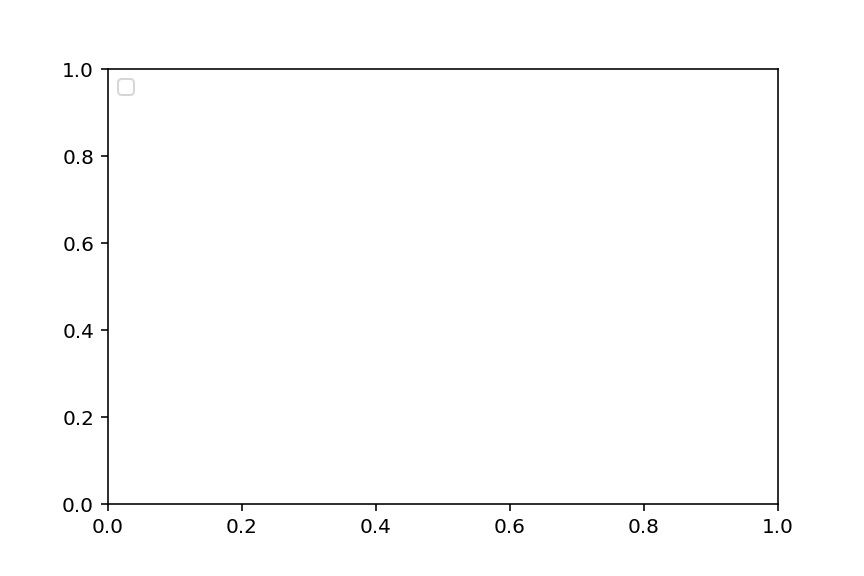

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


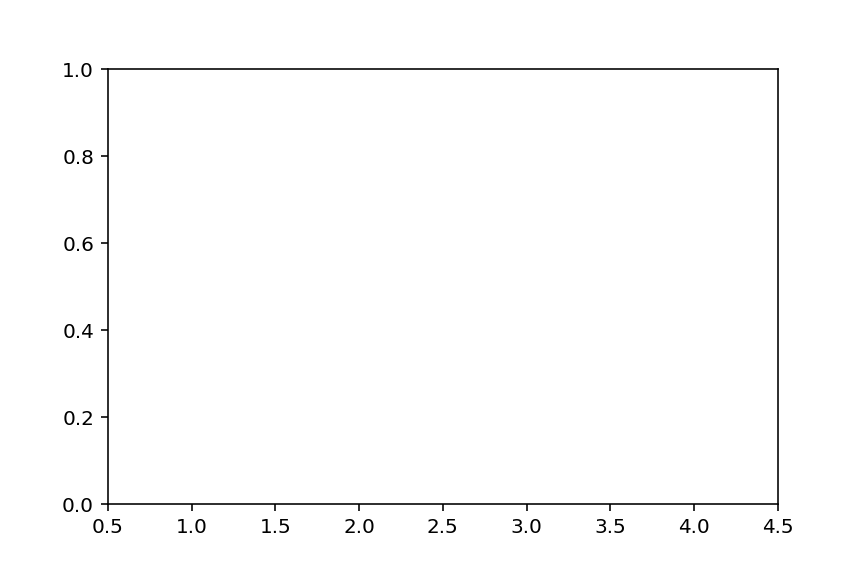

In [26]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

In [27]:
%matplotlib notebook

<IPython.core.display.Javascript object>


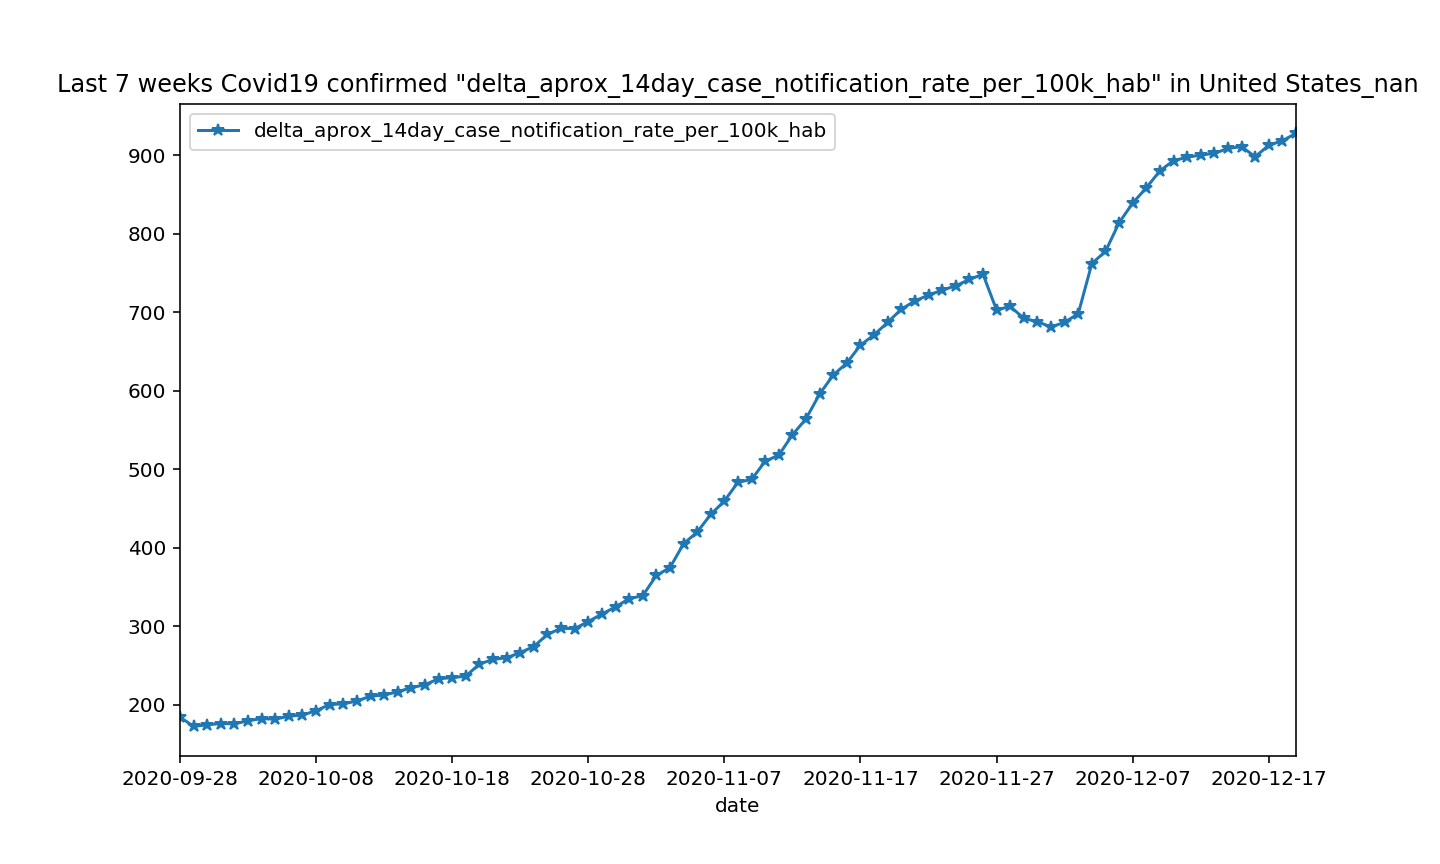

In [28]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


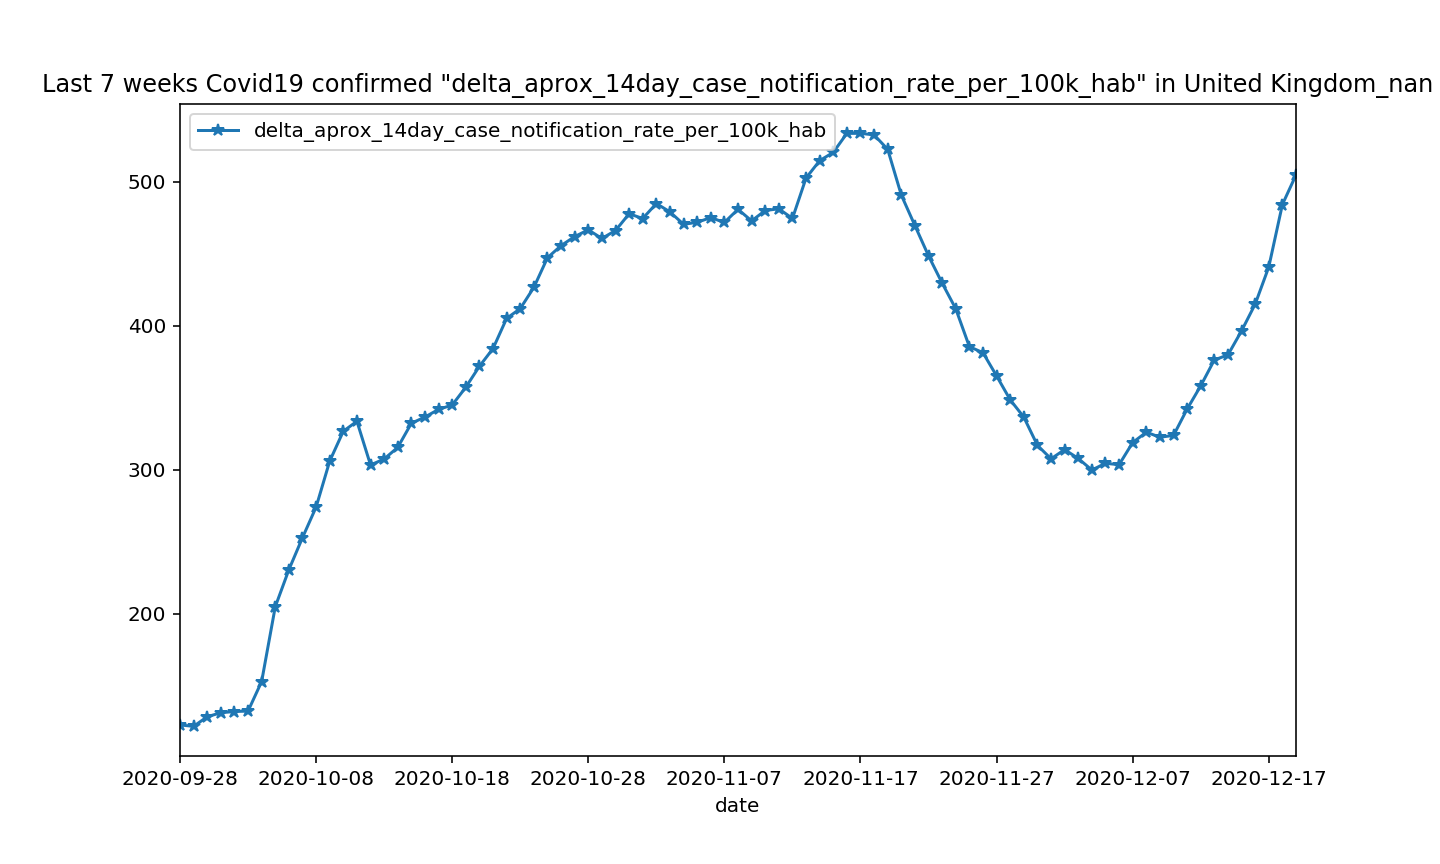

In [29]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


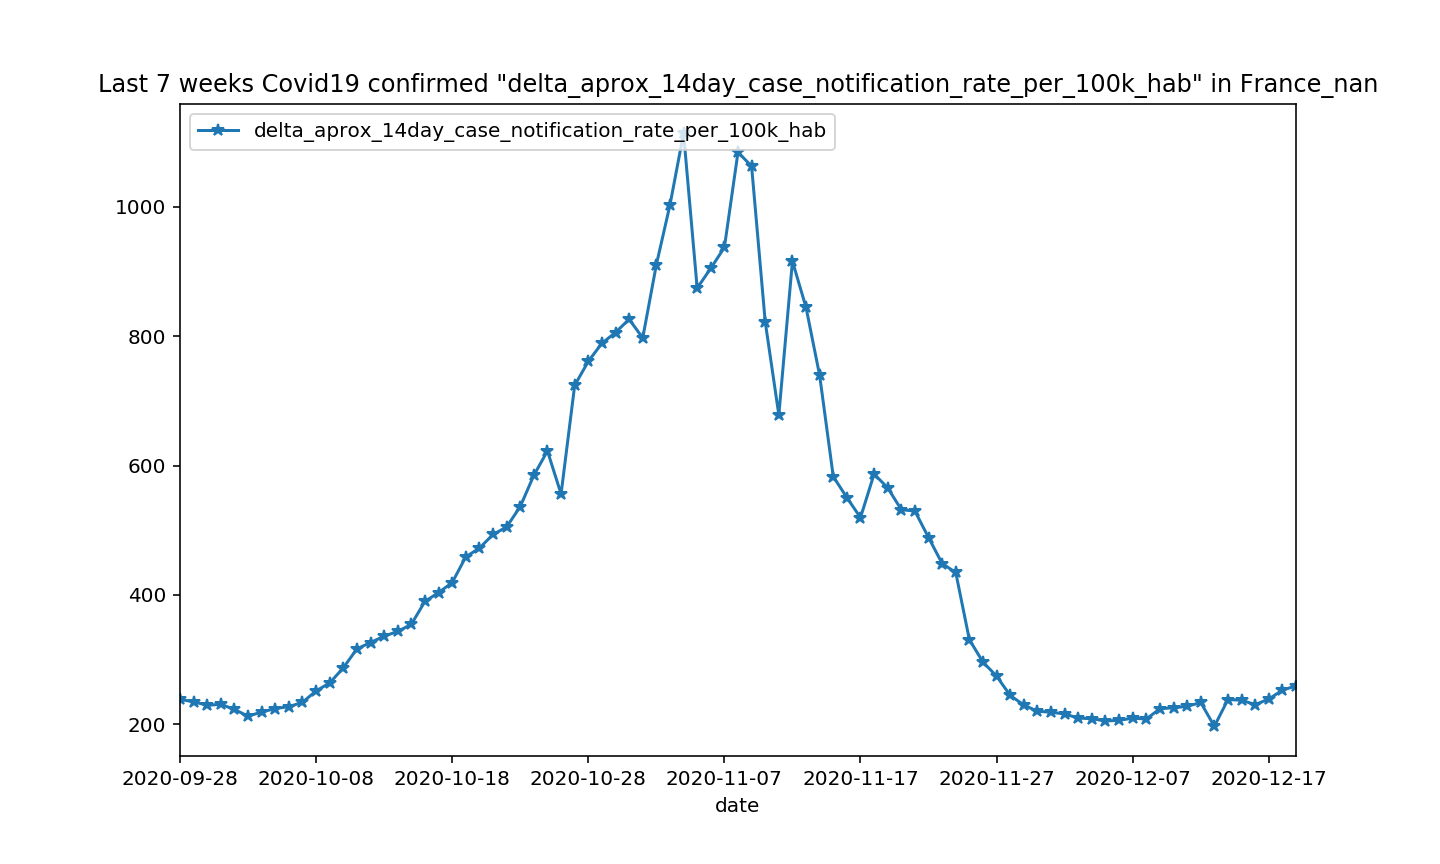

In [30]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


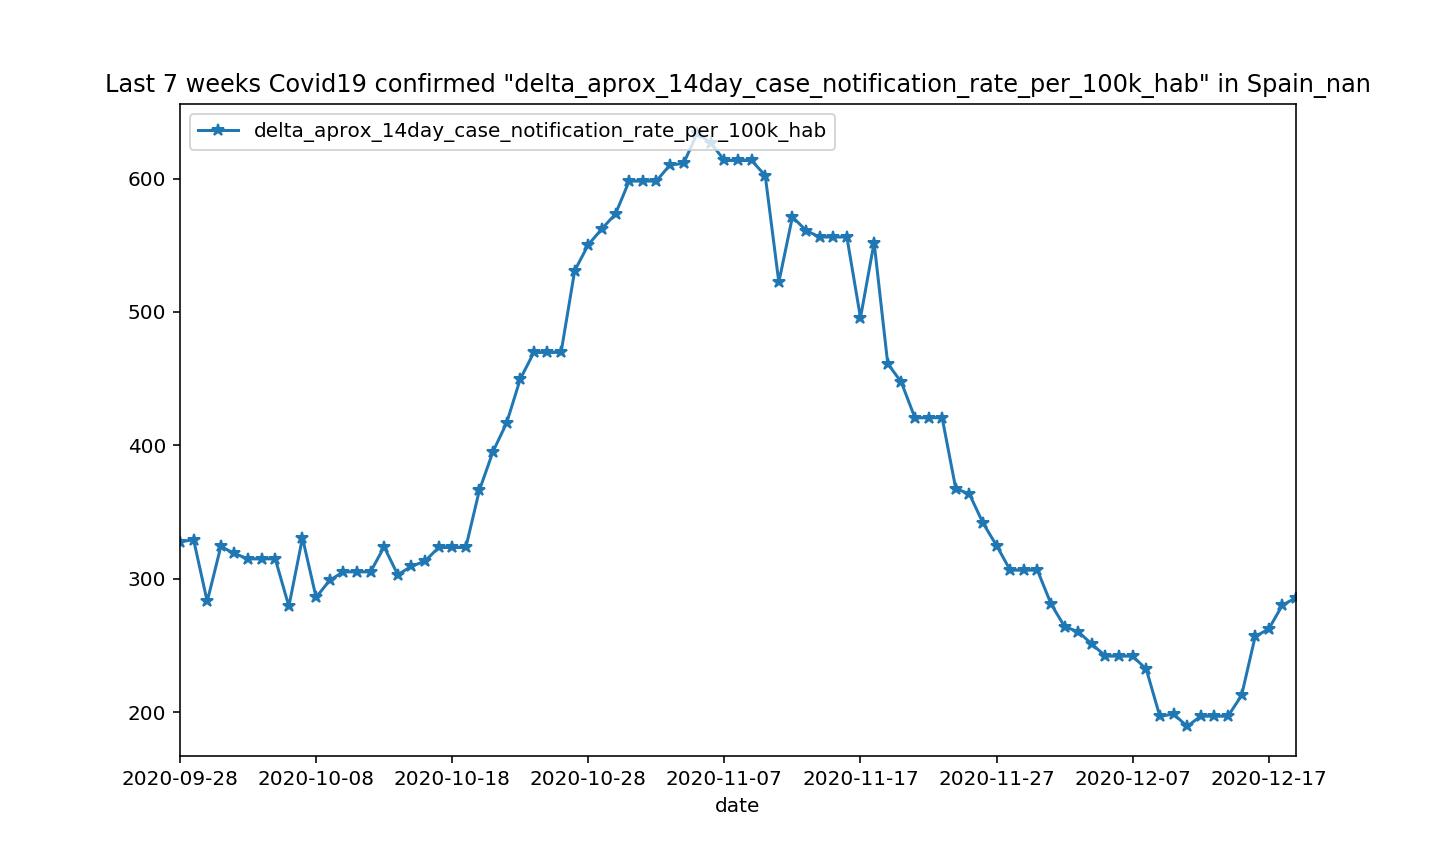

In [31]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


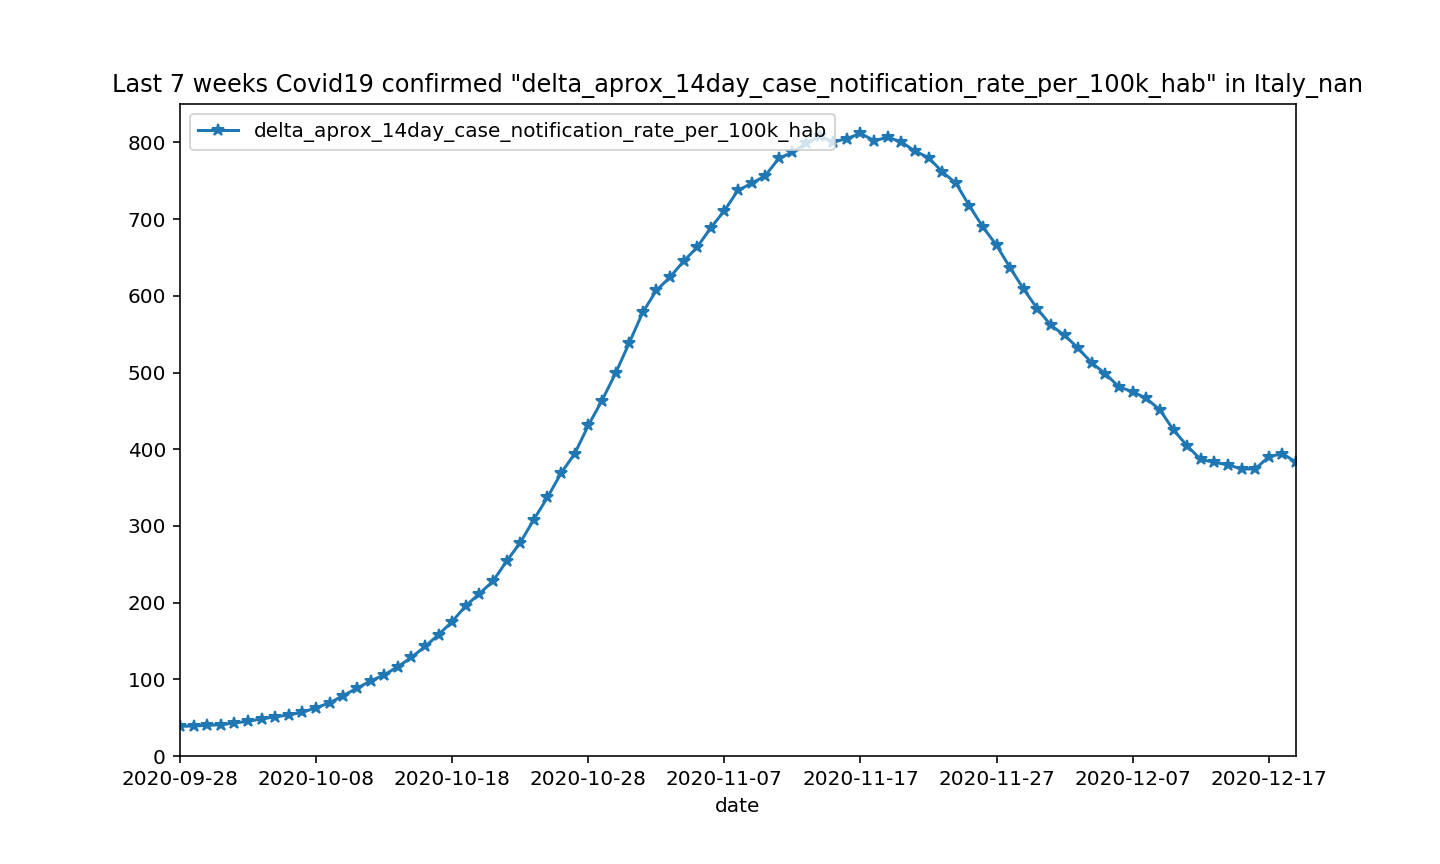

In [32]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


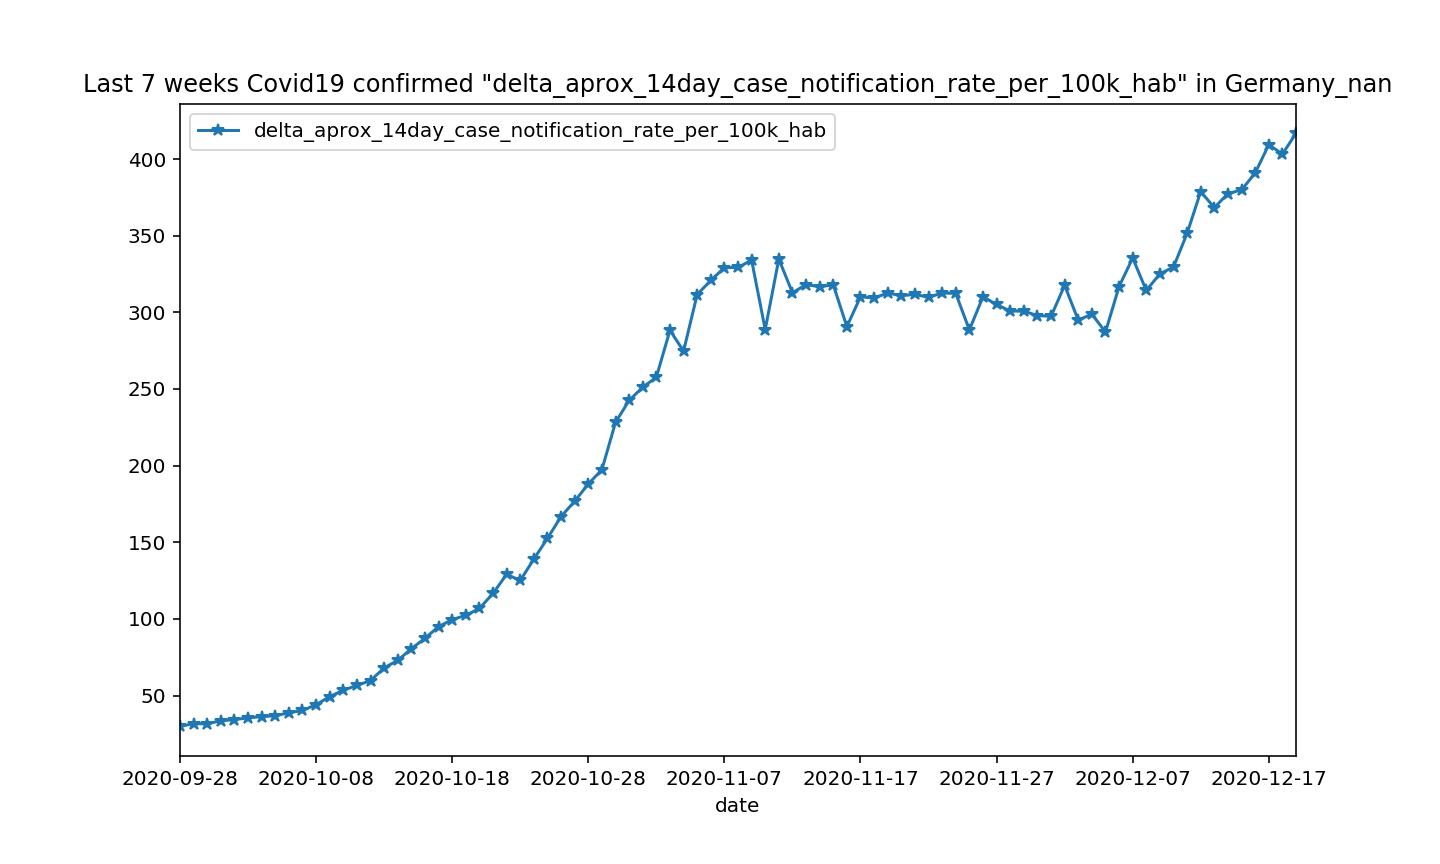

In [33]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


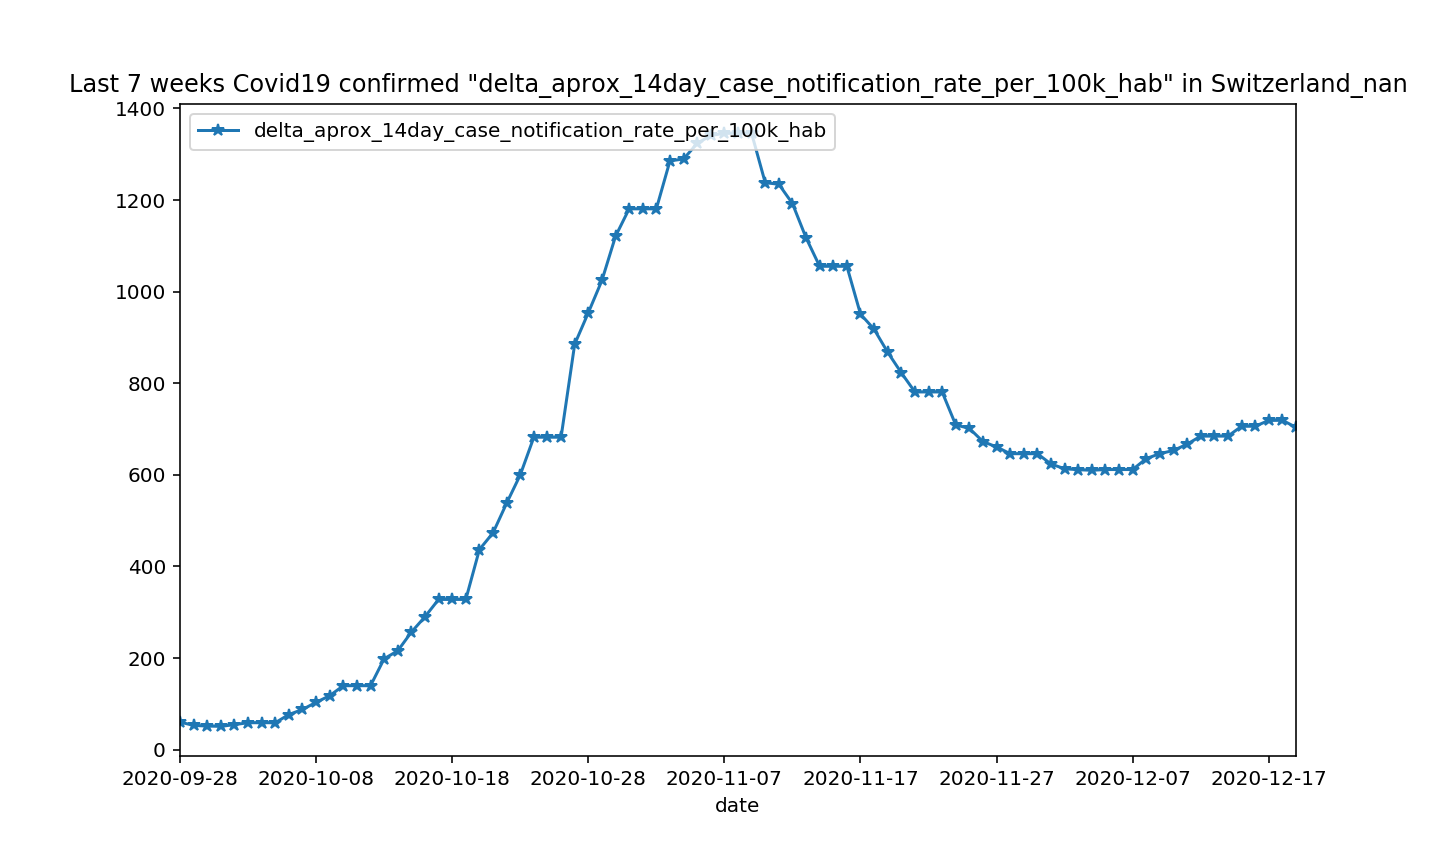

In [34]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


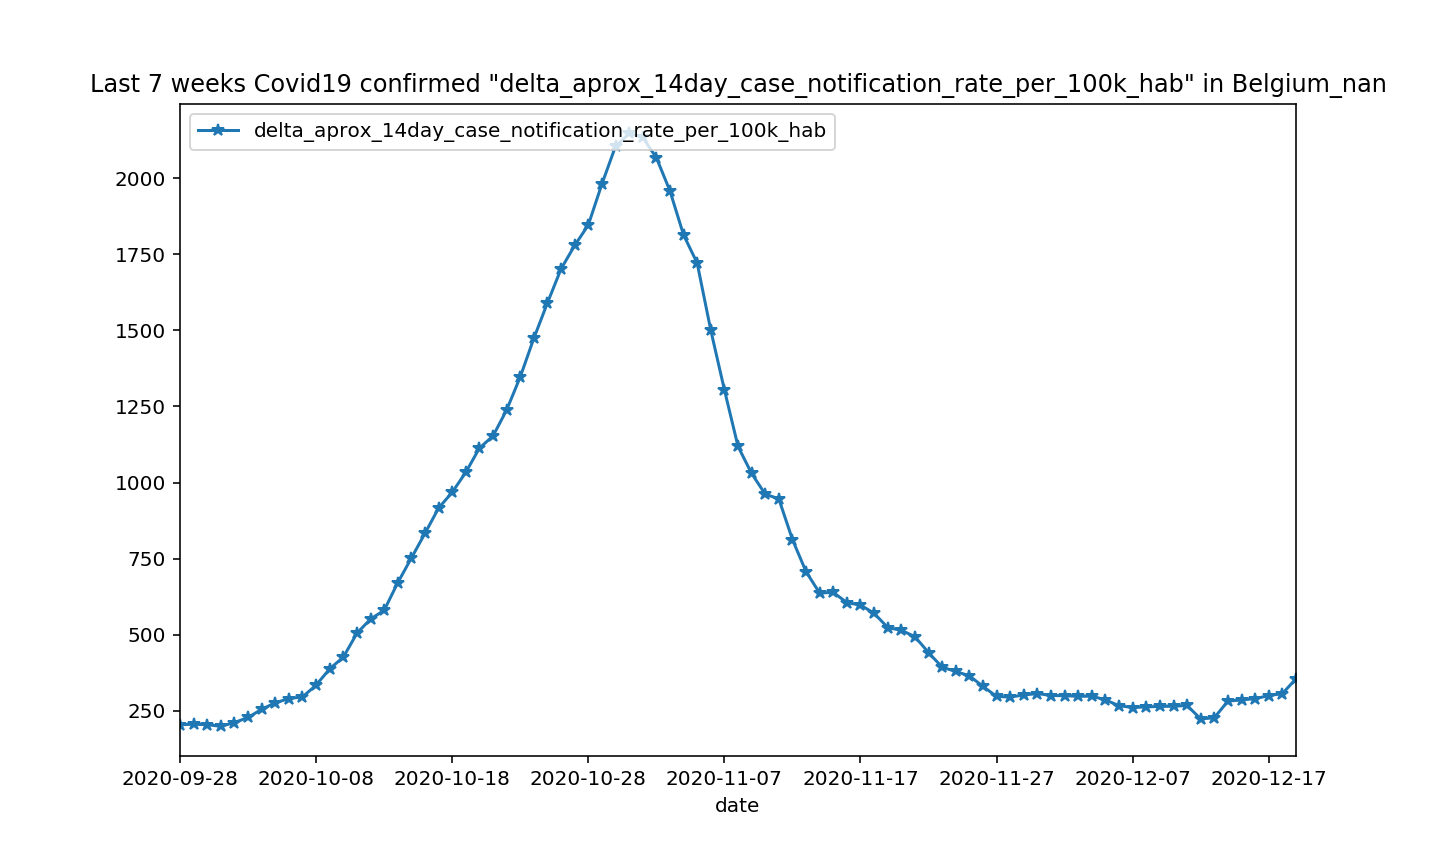

In [35]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


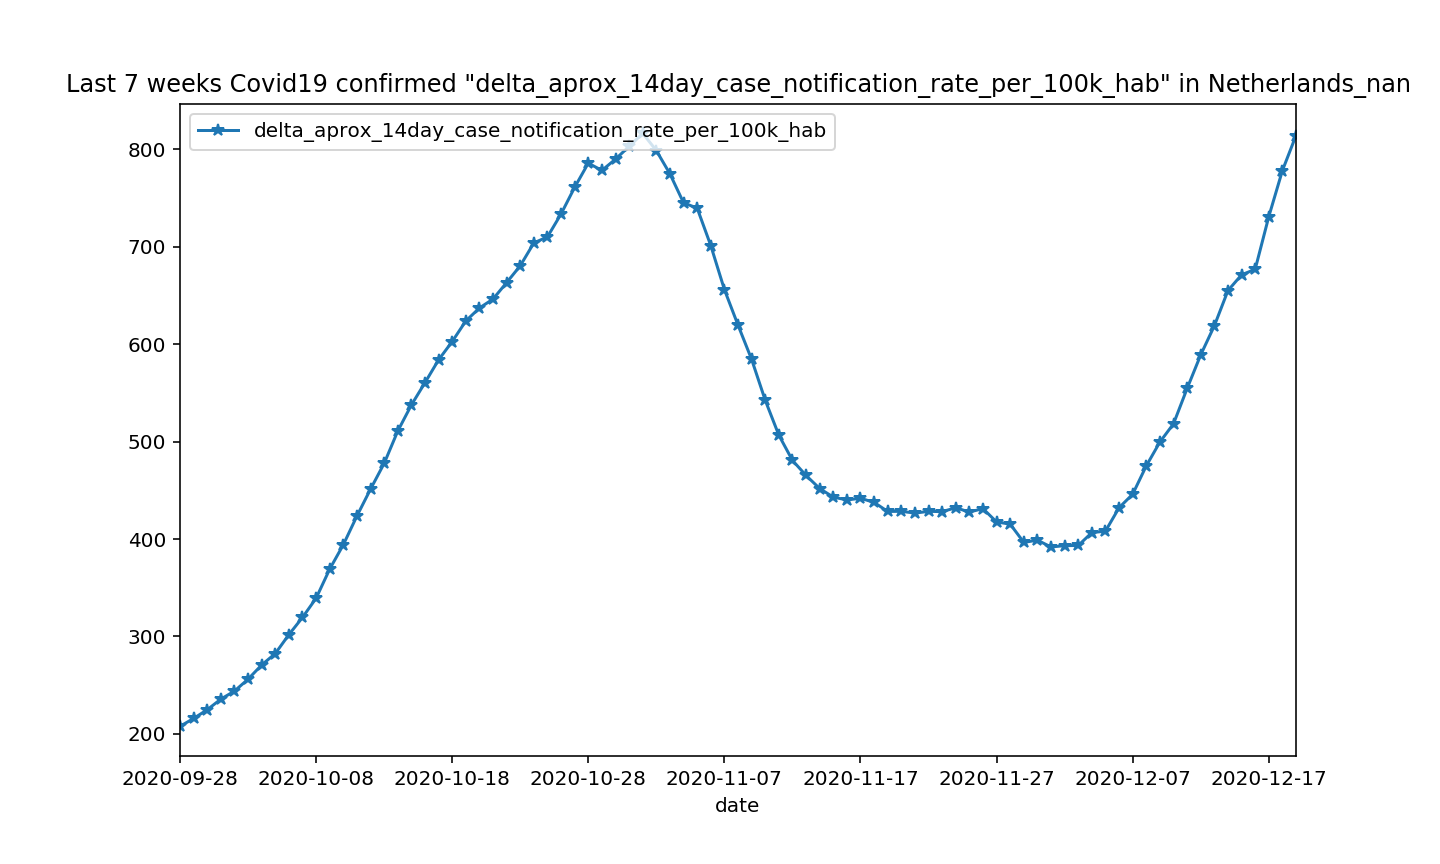

In [36]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


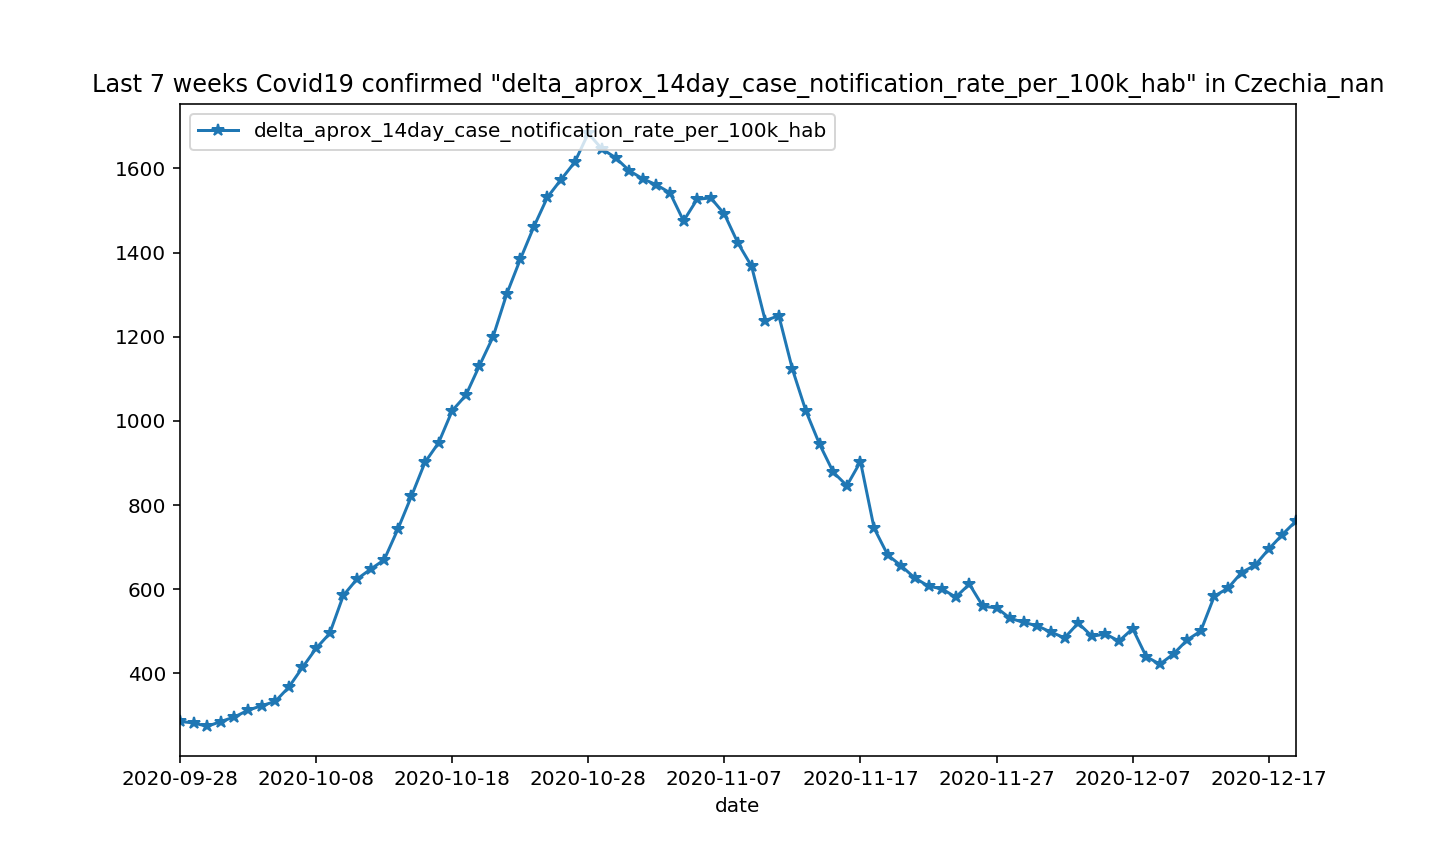

In [37]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


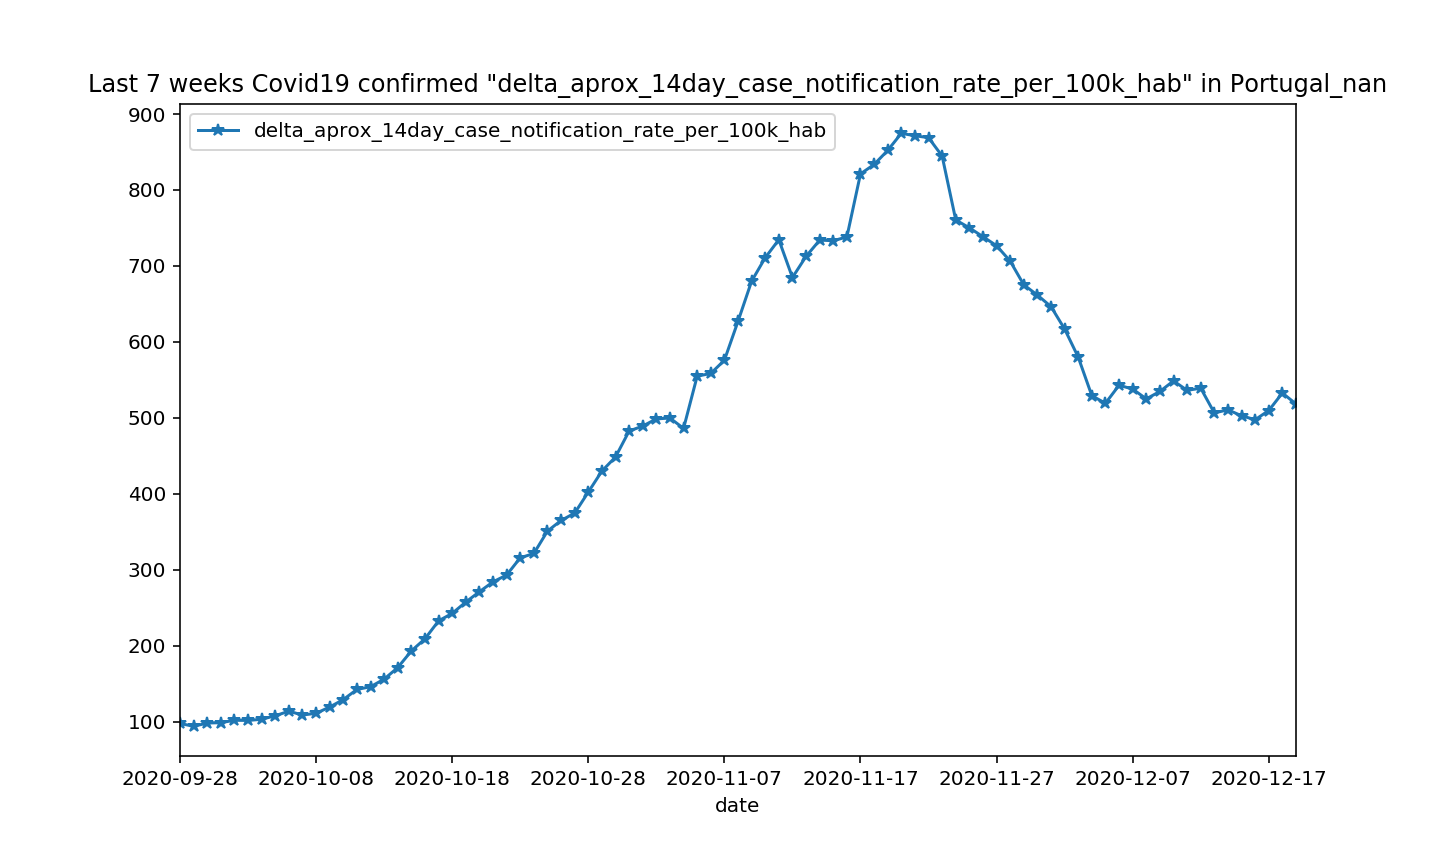

In [38]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [39]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


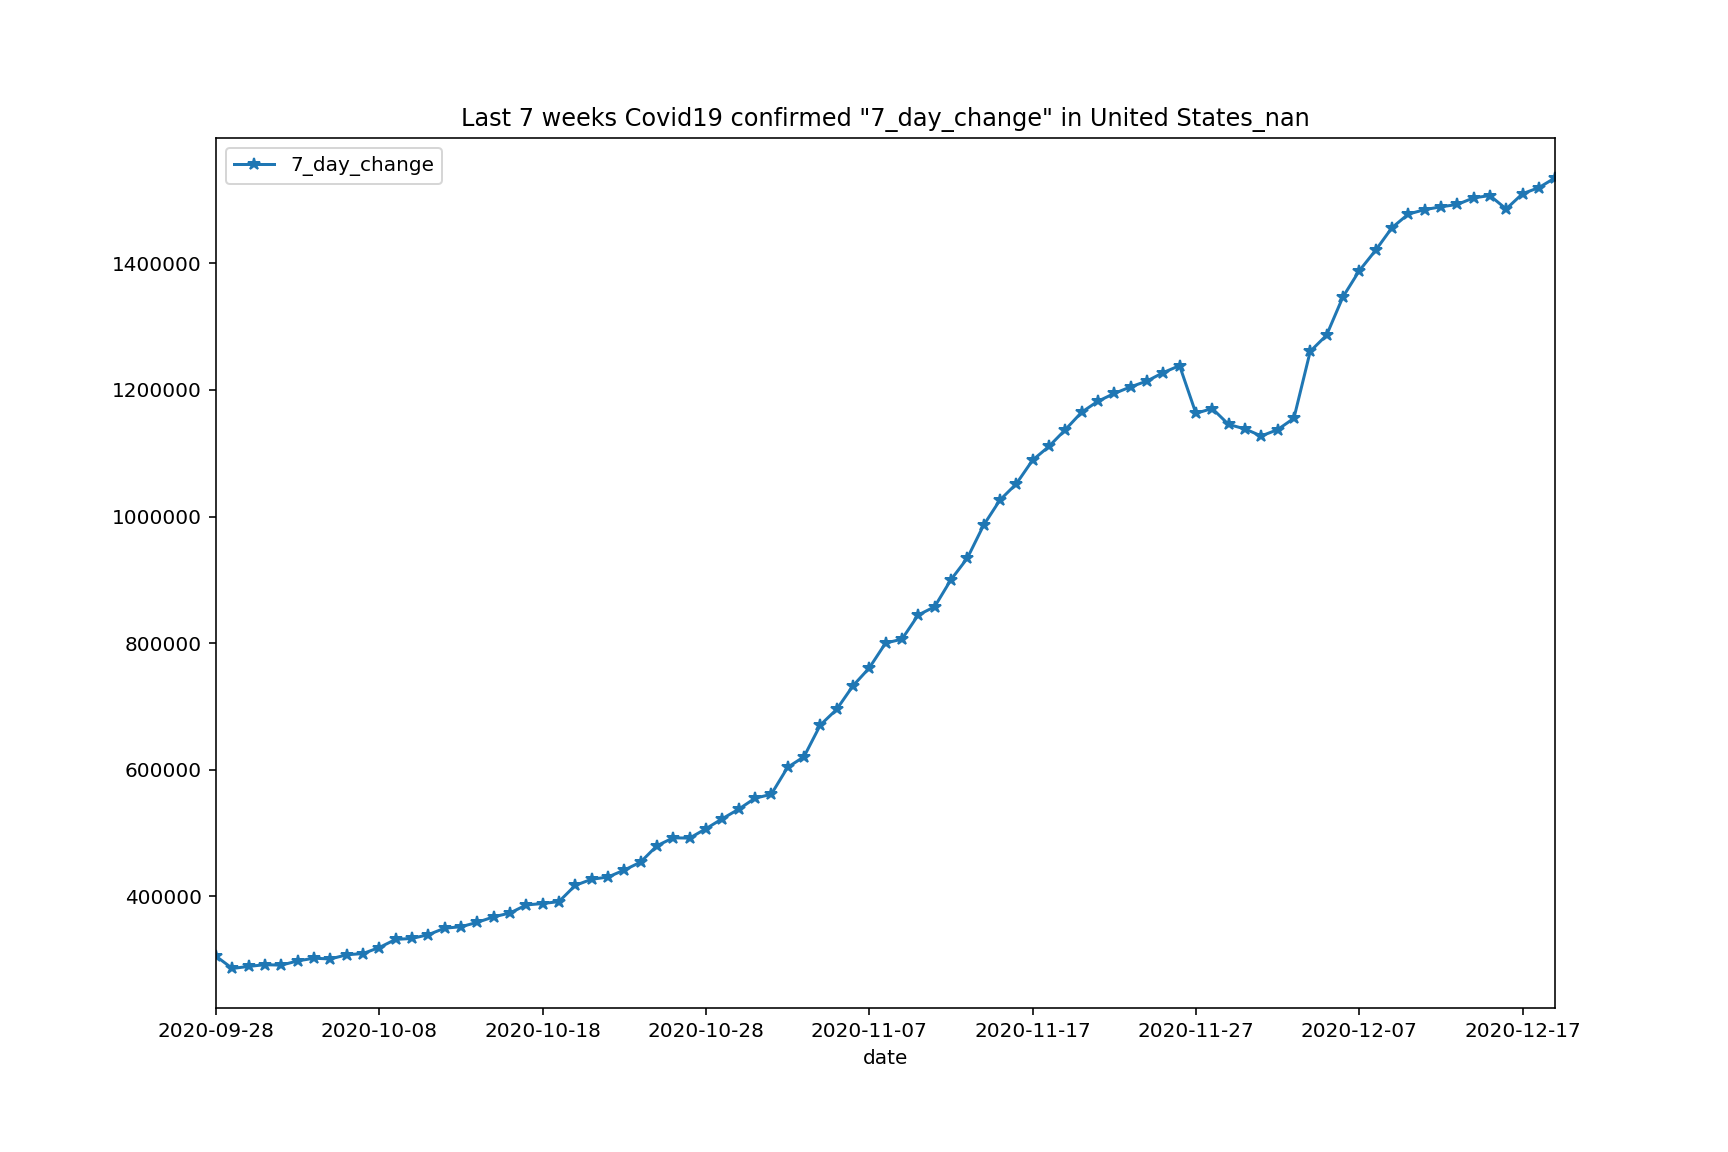

In [40]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


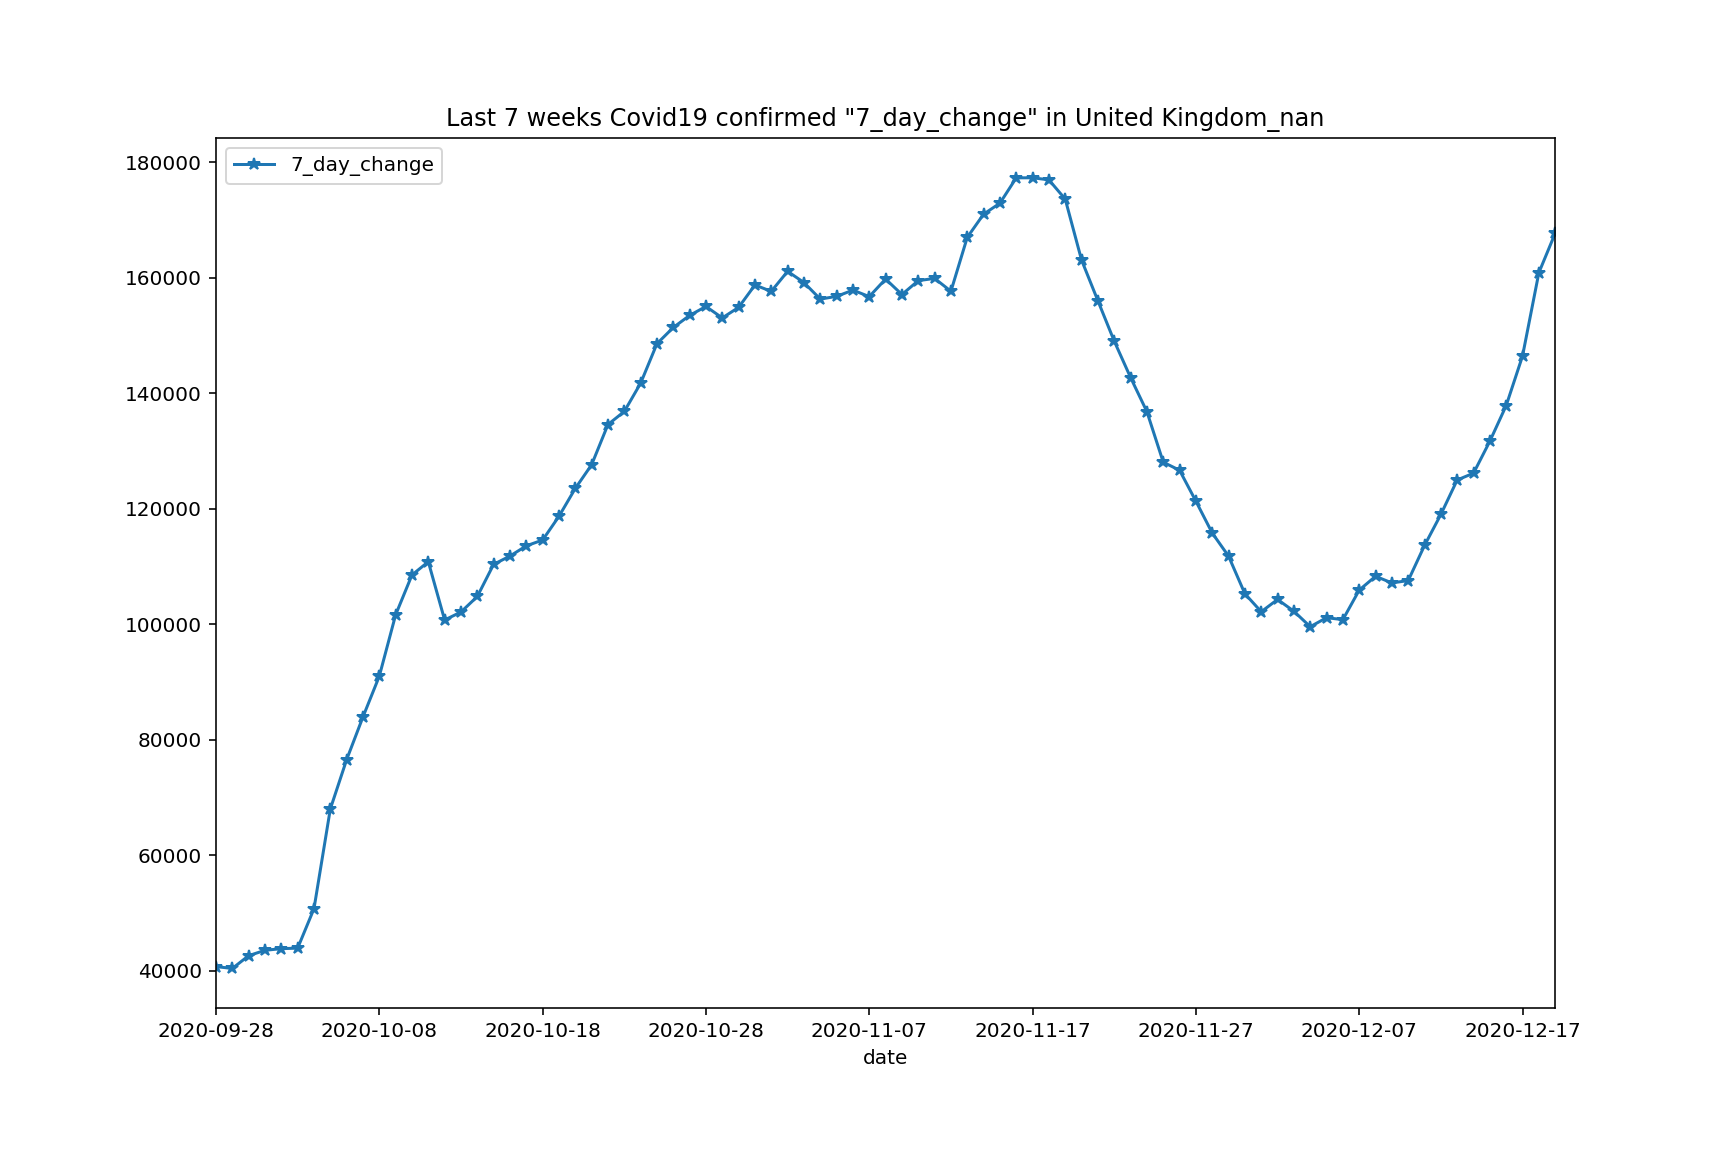

In [41]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


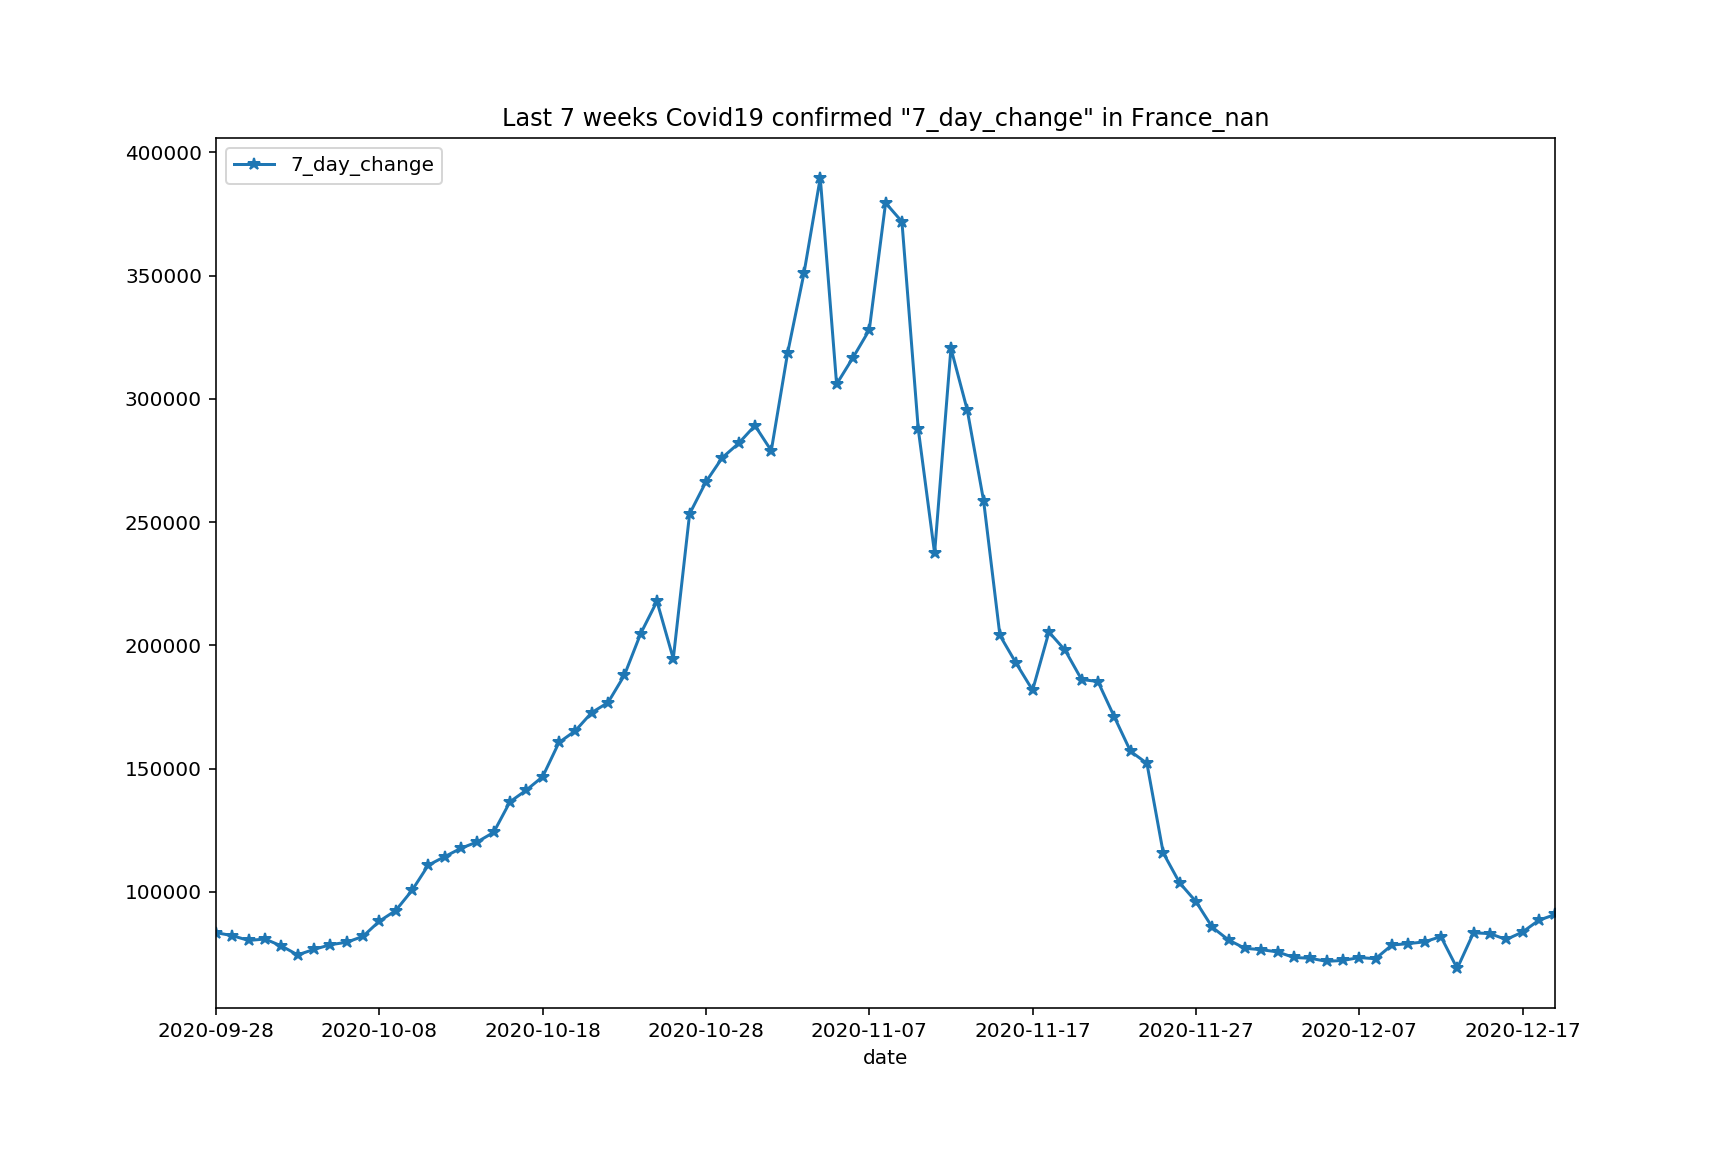

In [42]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


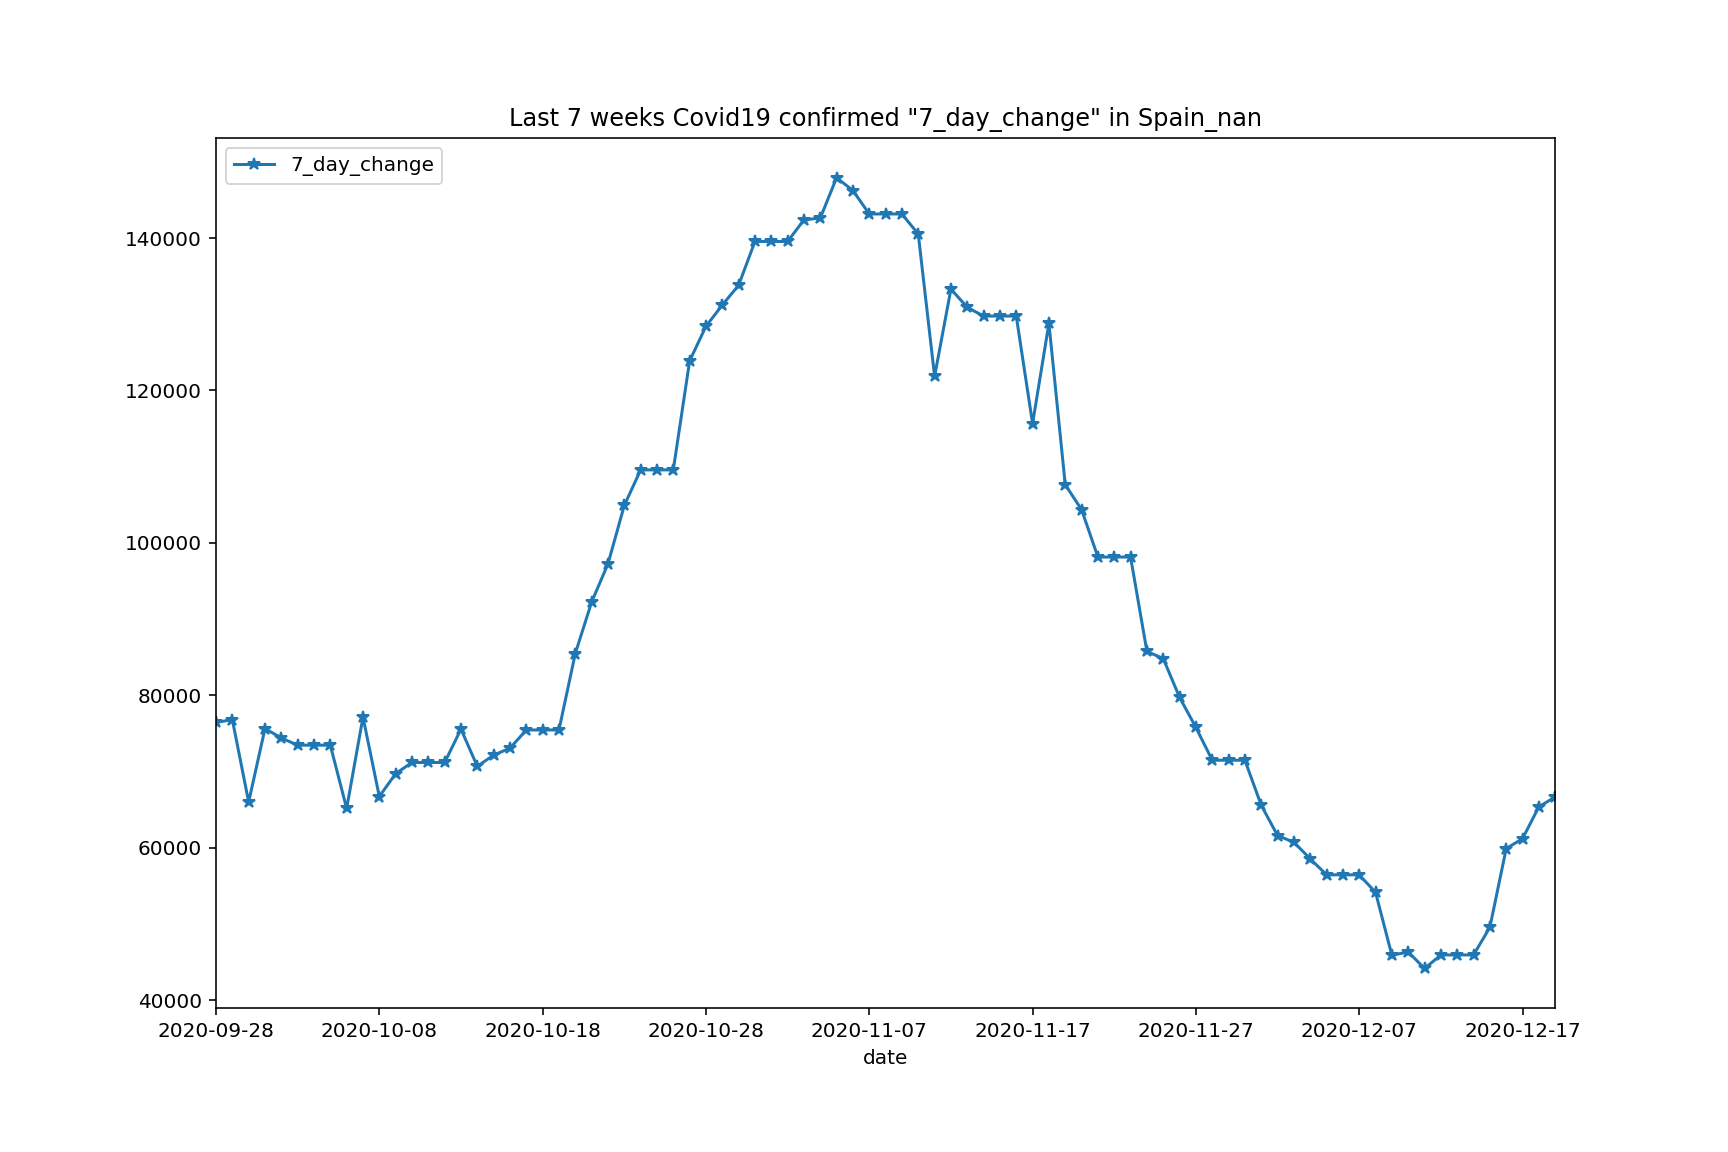

In [43]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


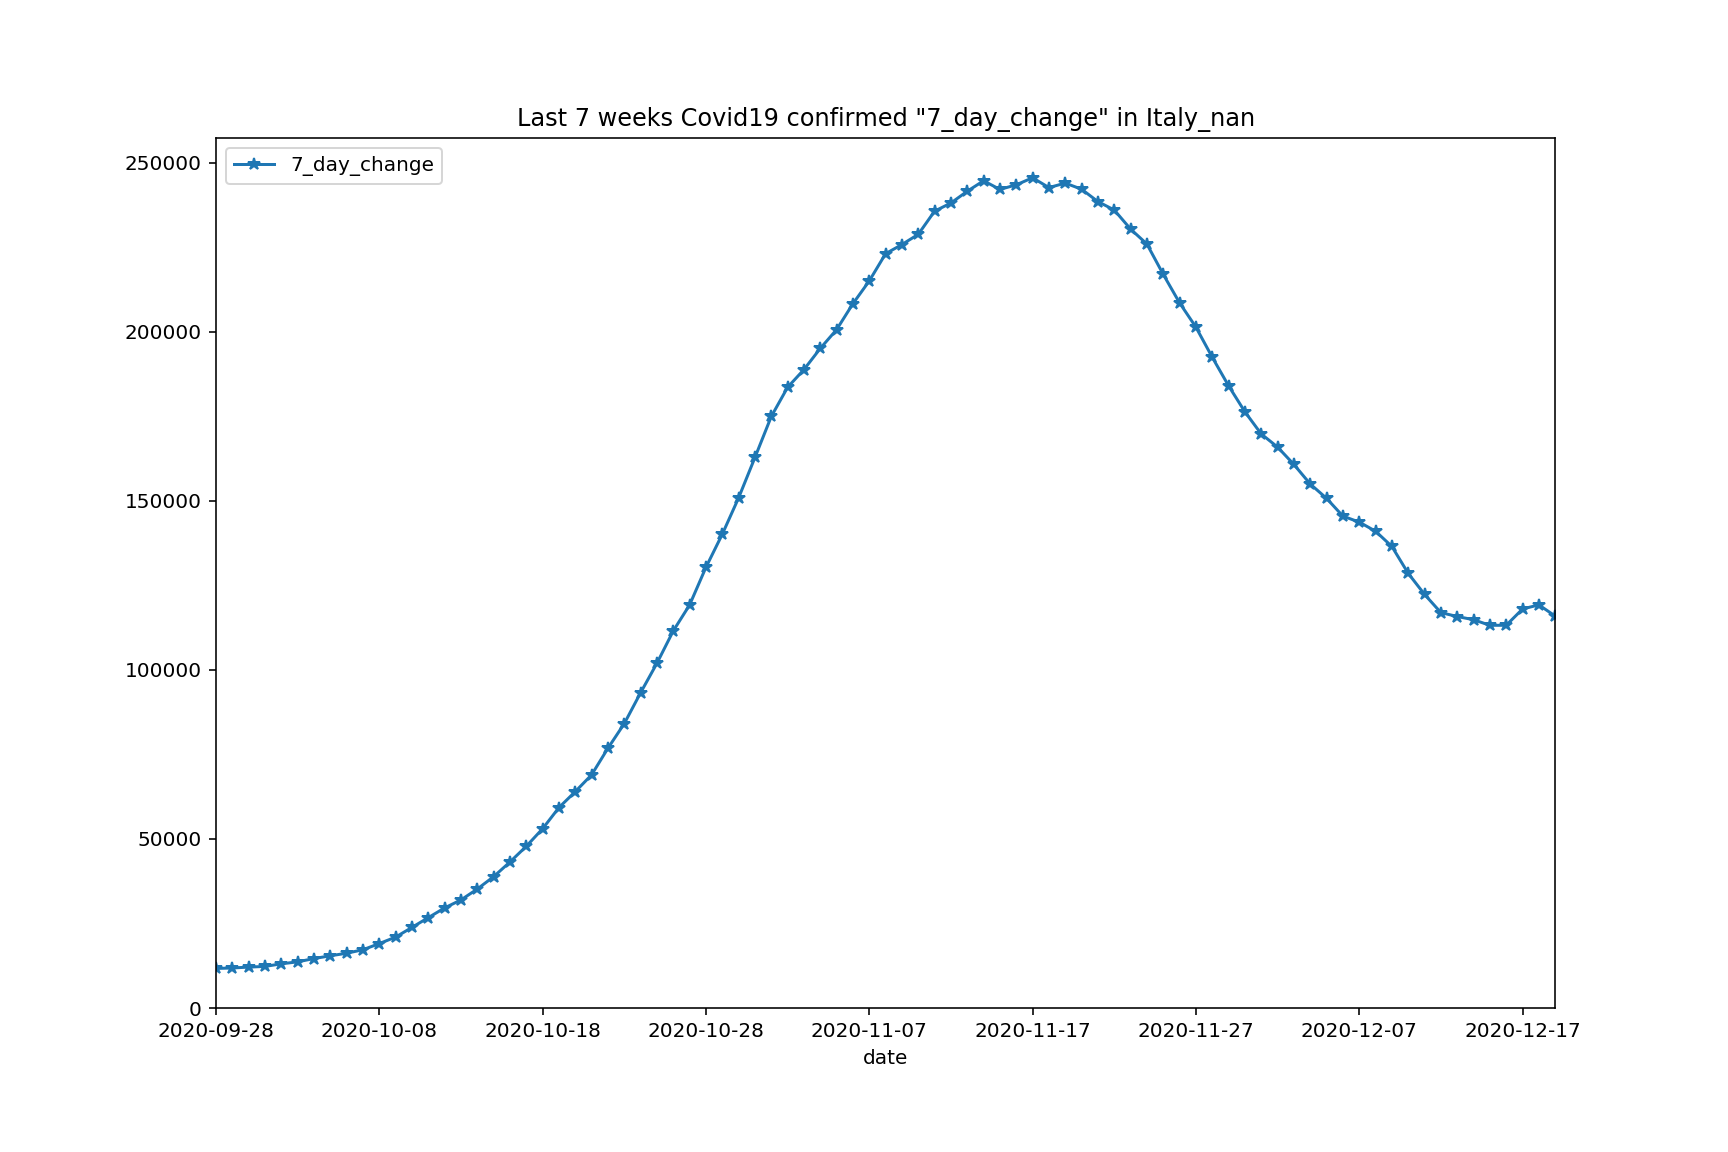

In [44]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


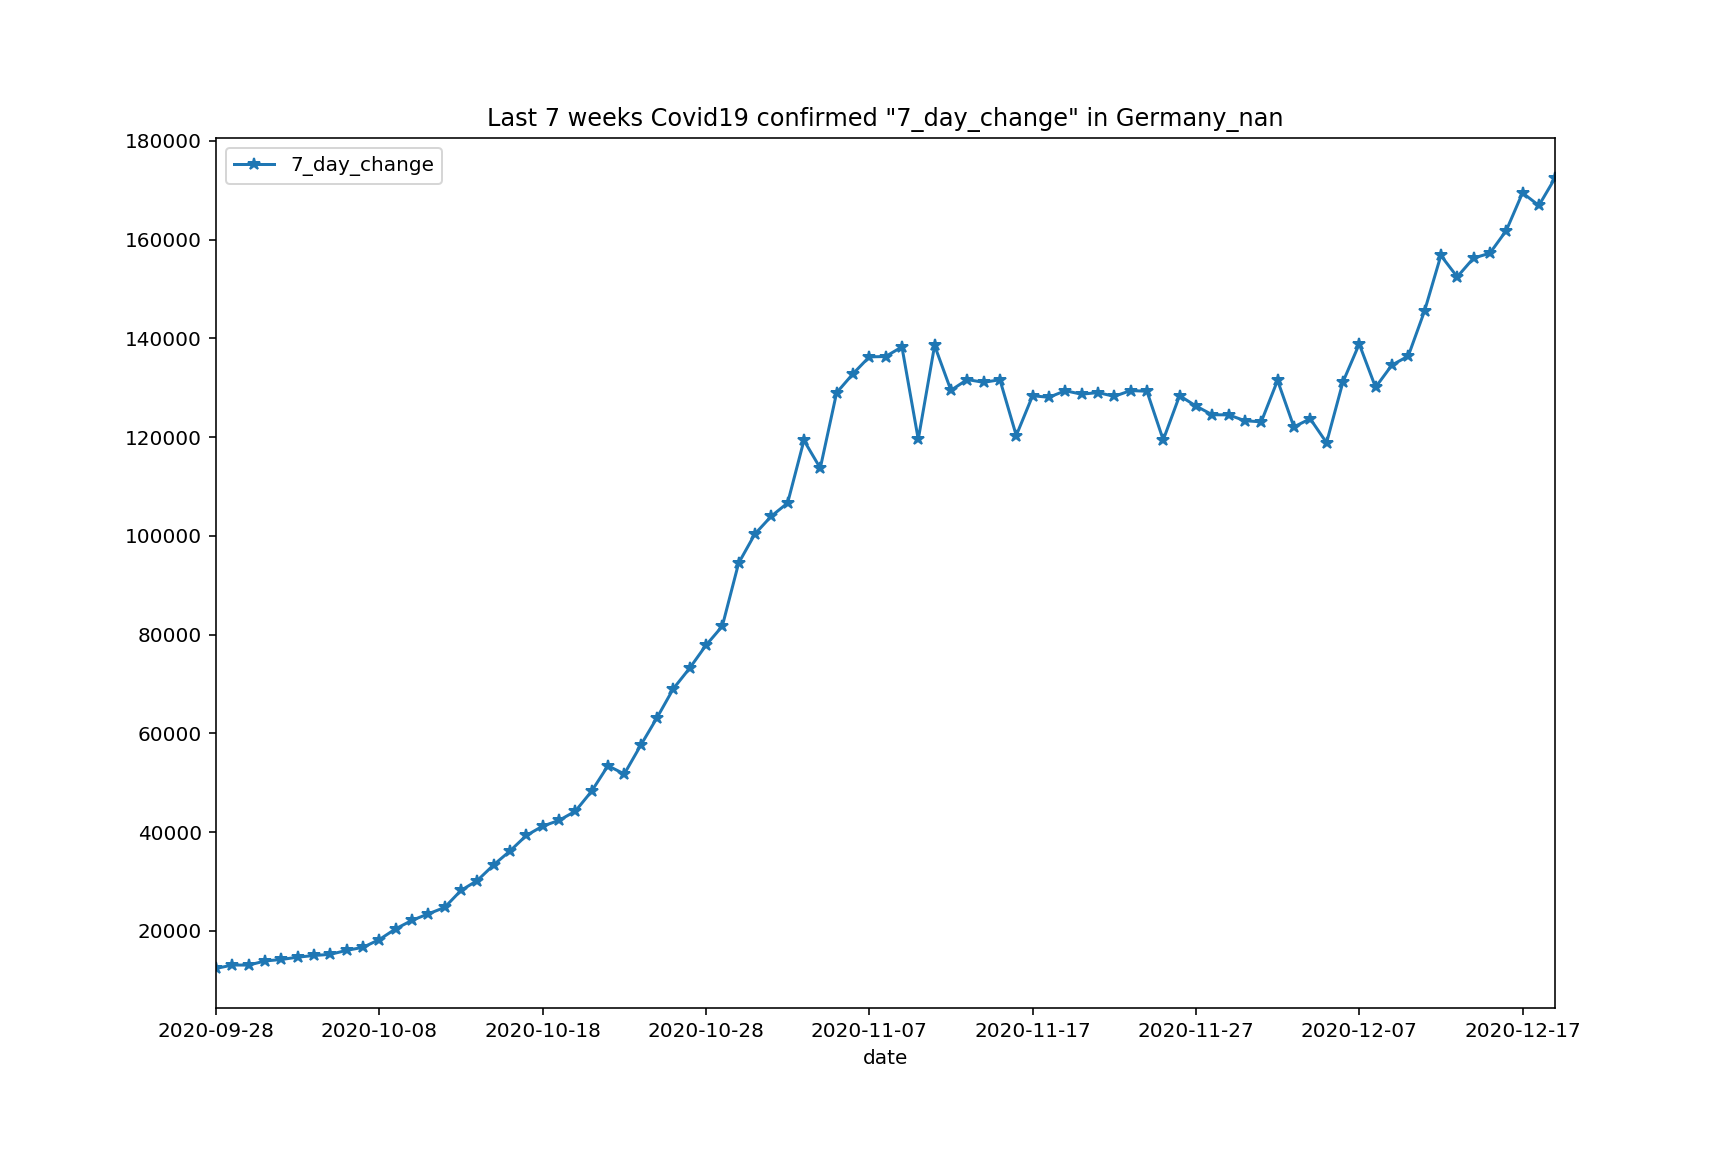

In [45]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


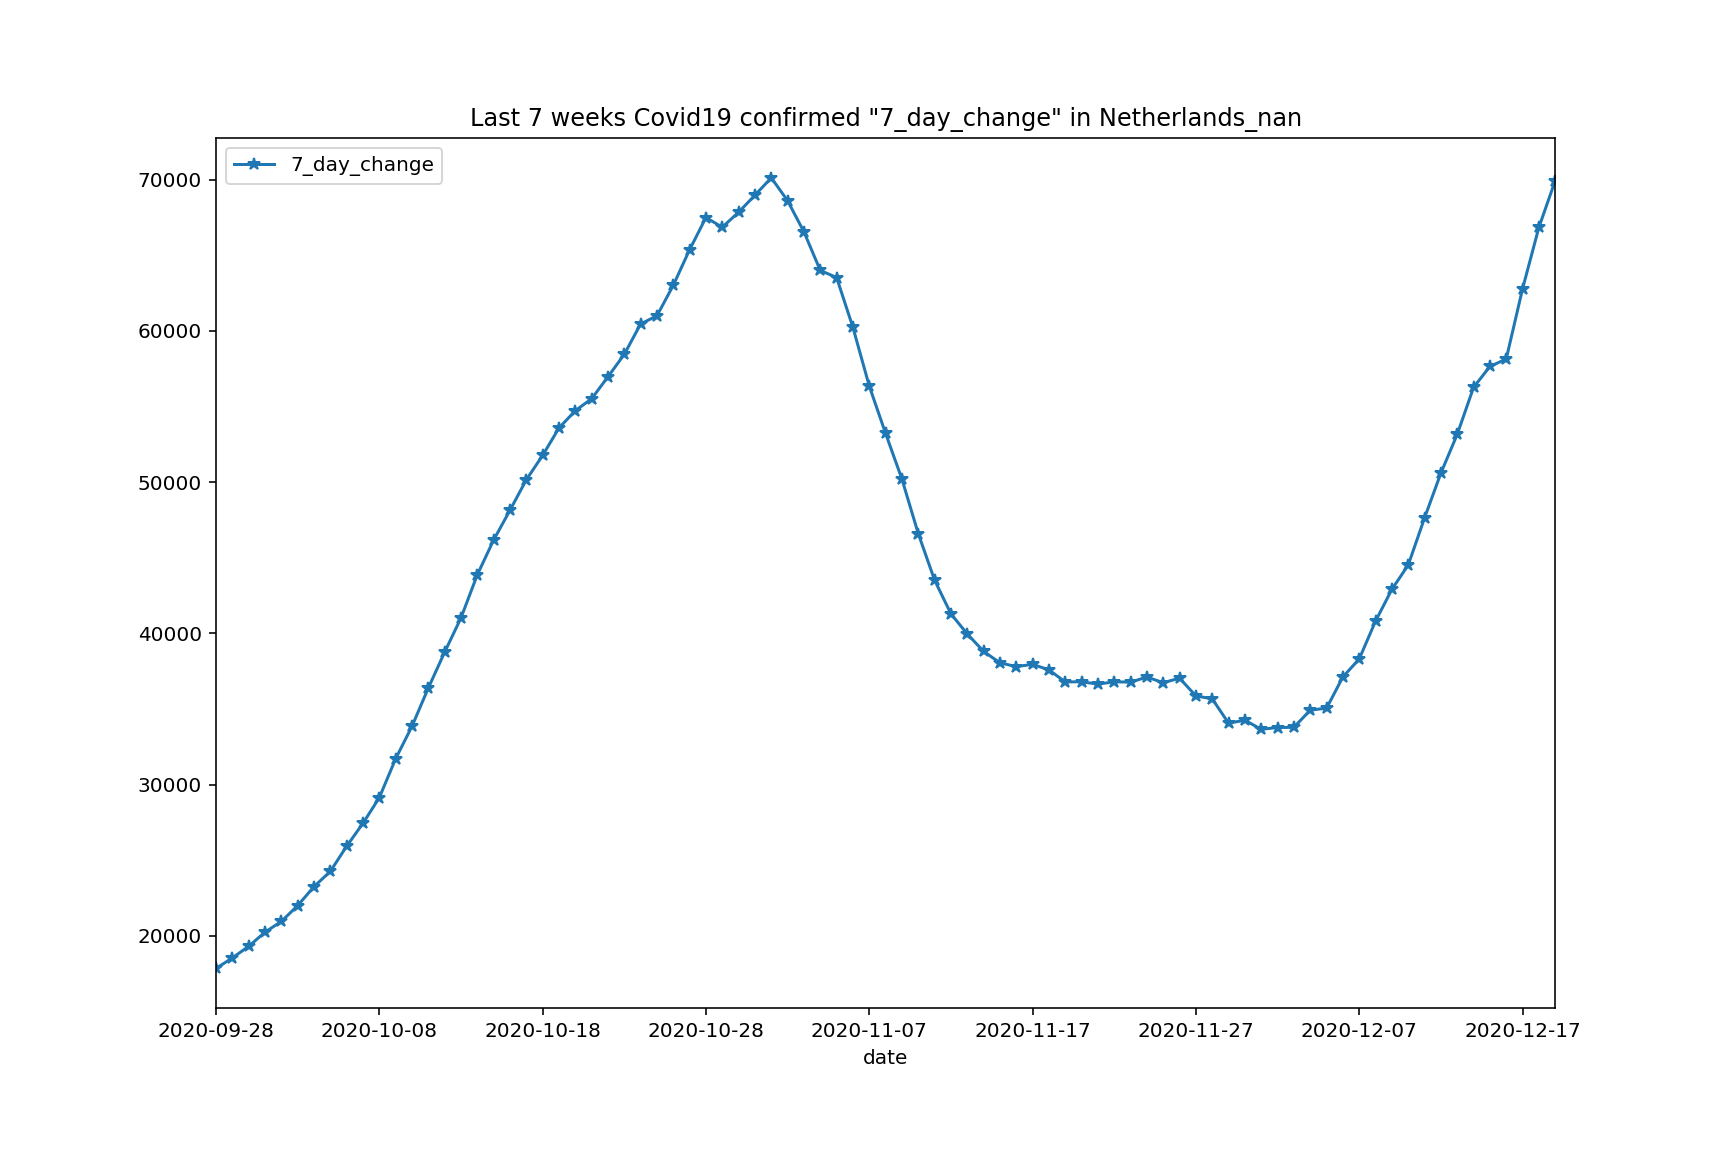

In [46]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


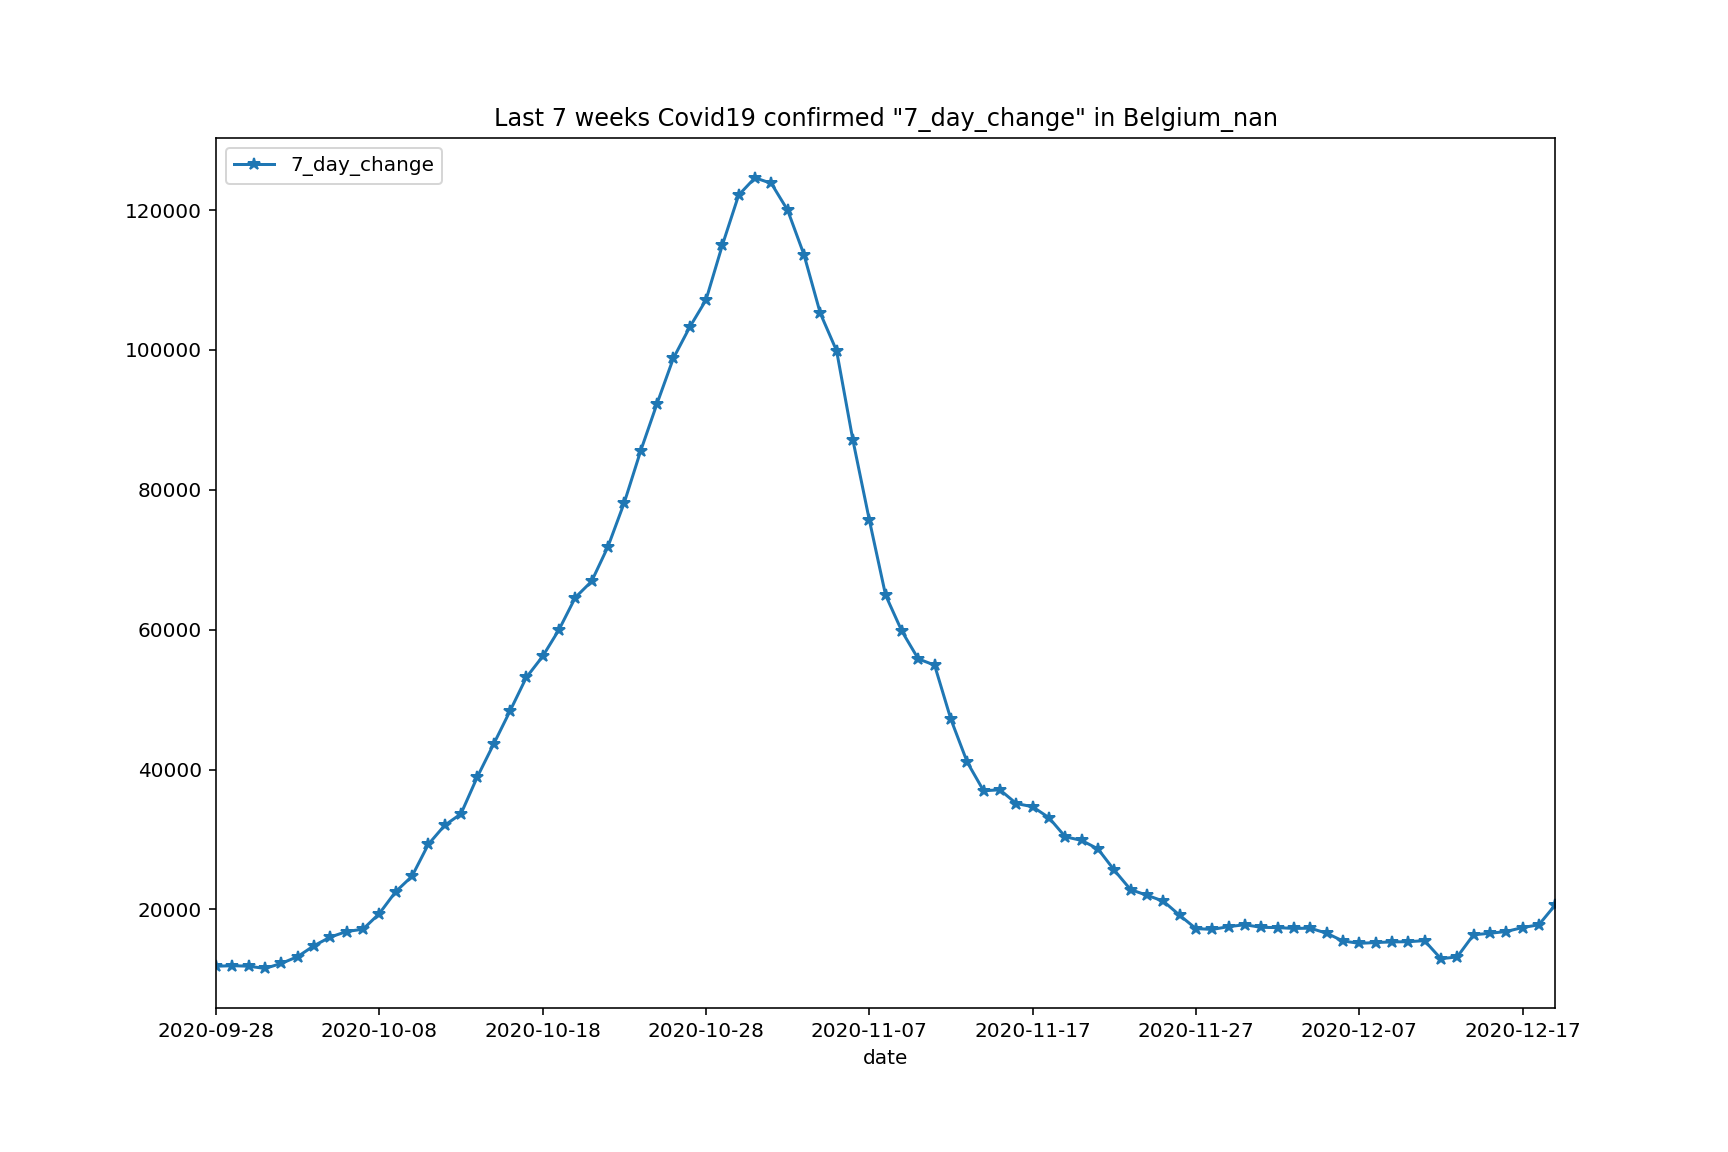

In [47]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


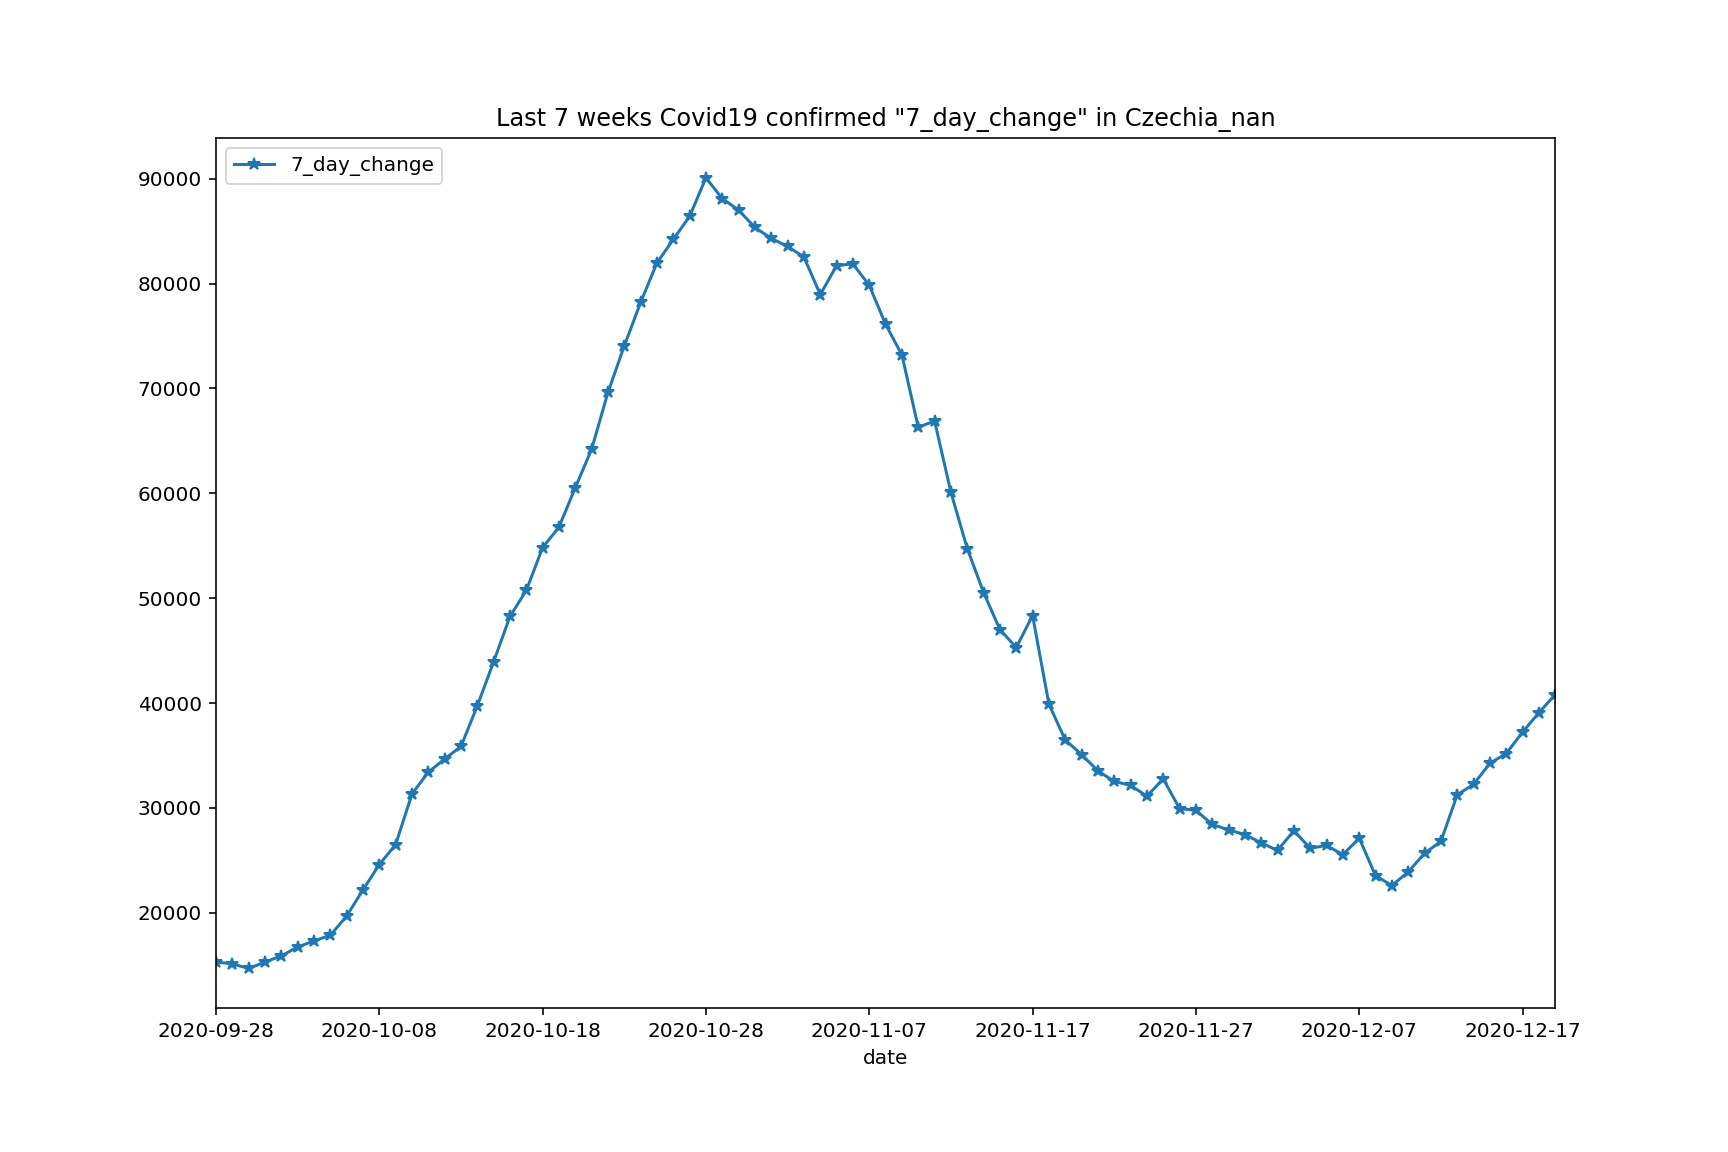

In [48]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


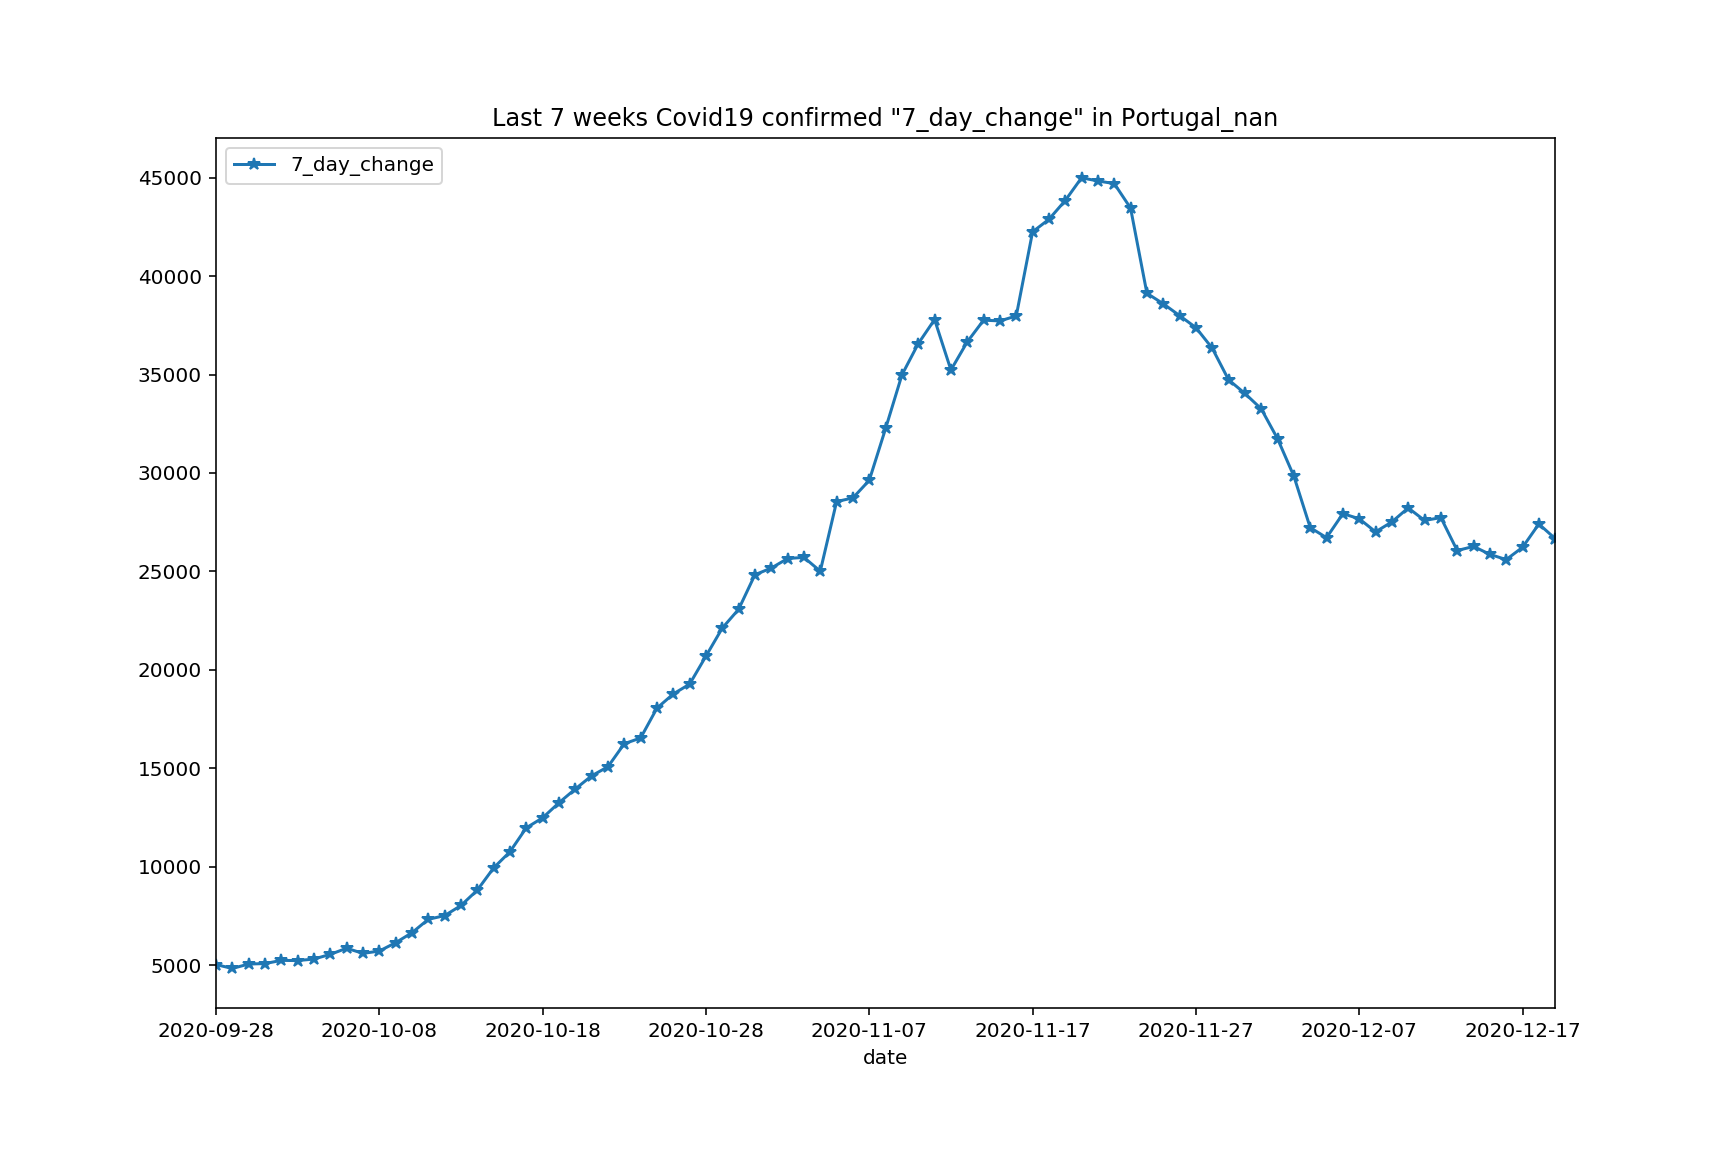

In [49]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [50]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


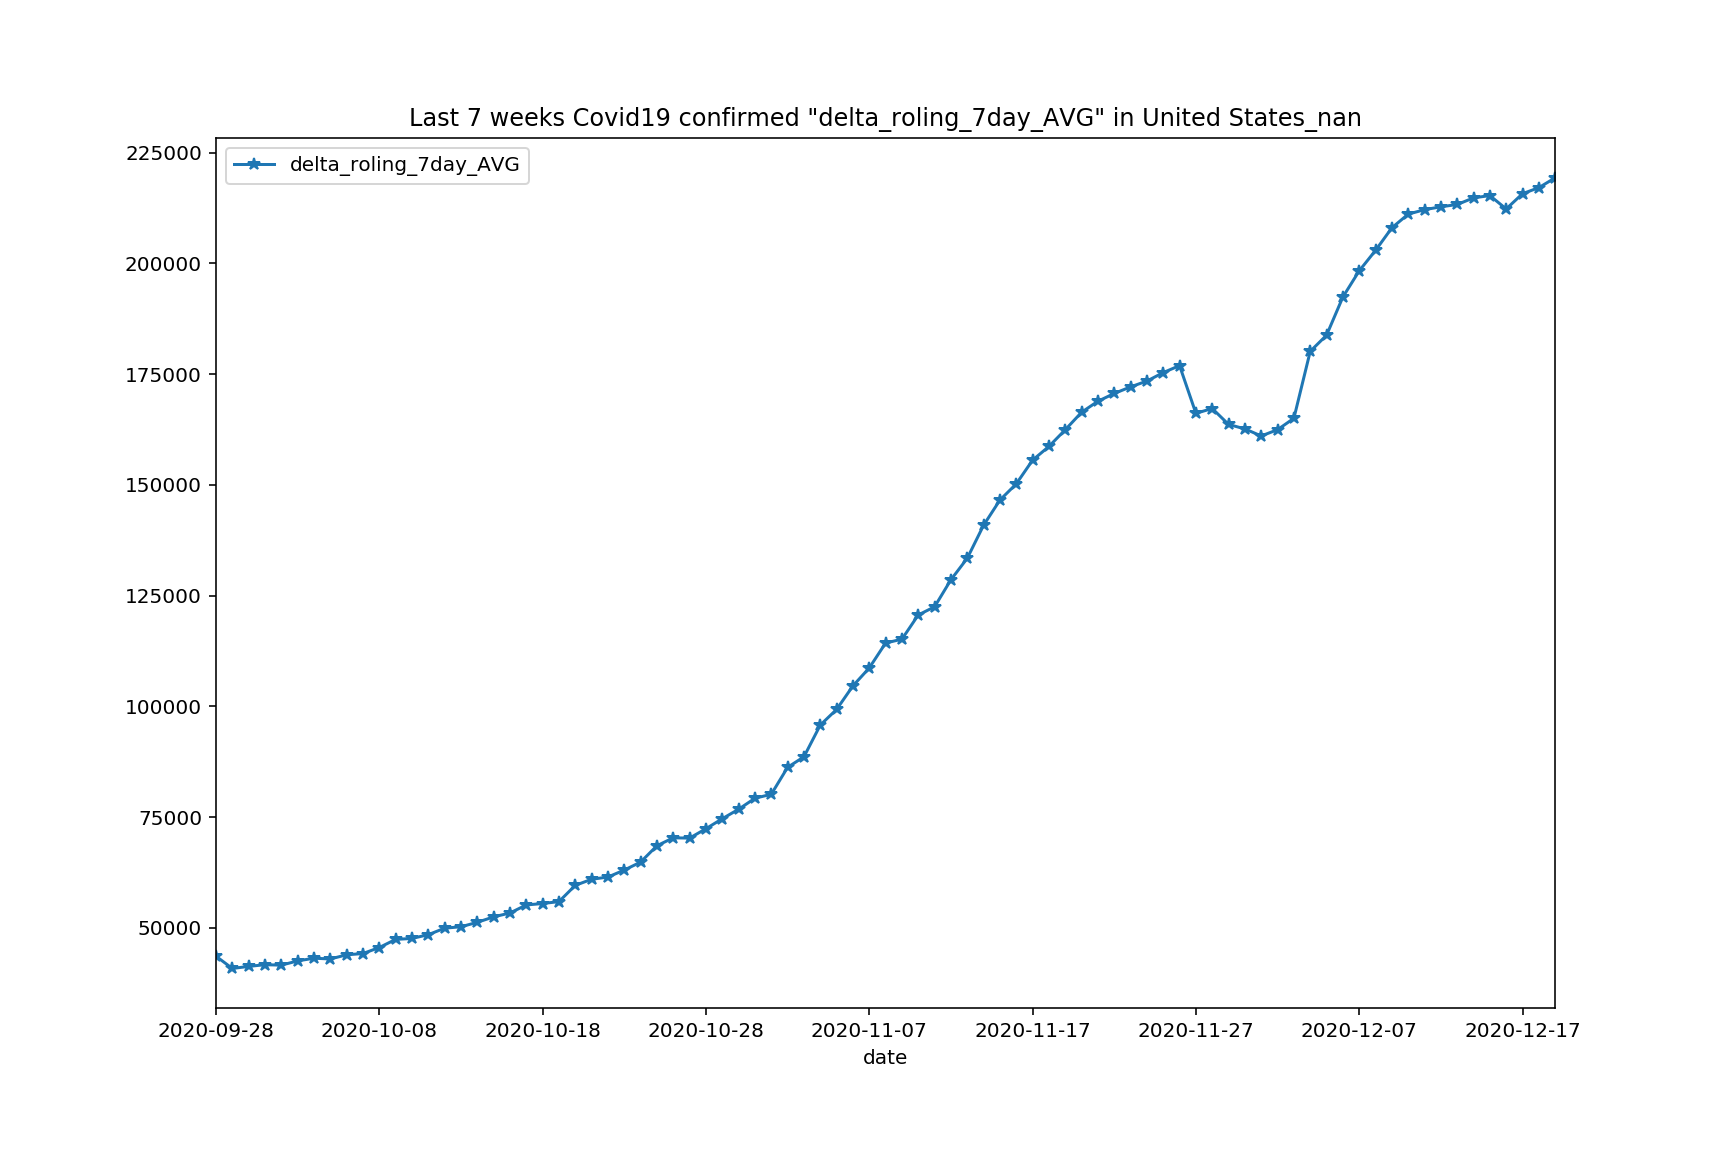

In [51]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


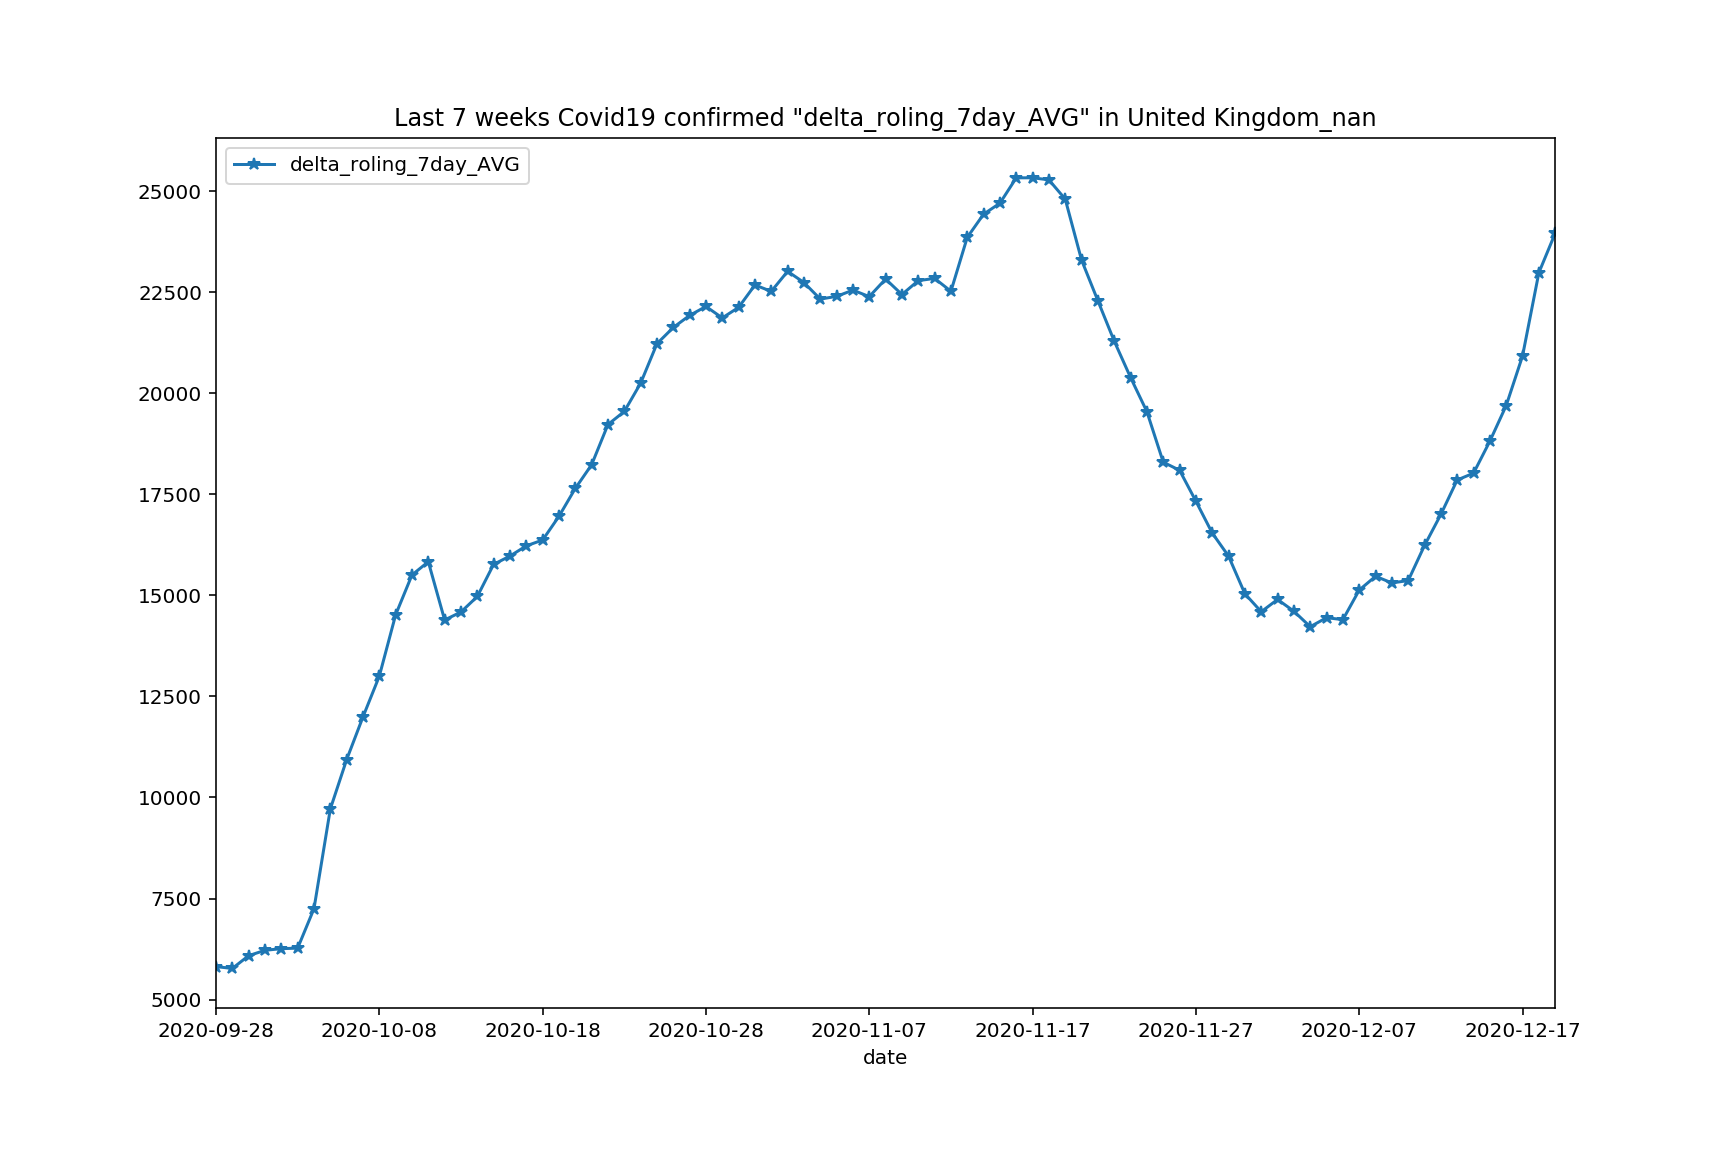

In [52]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


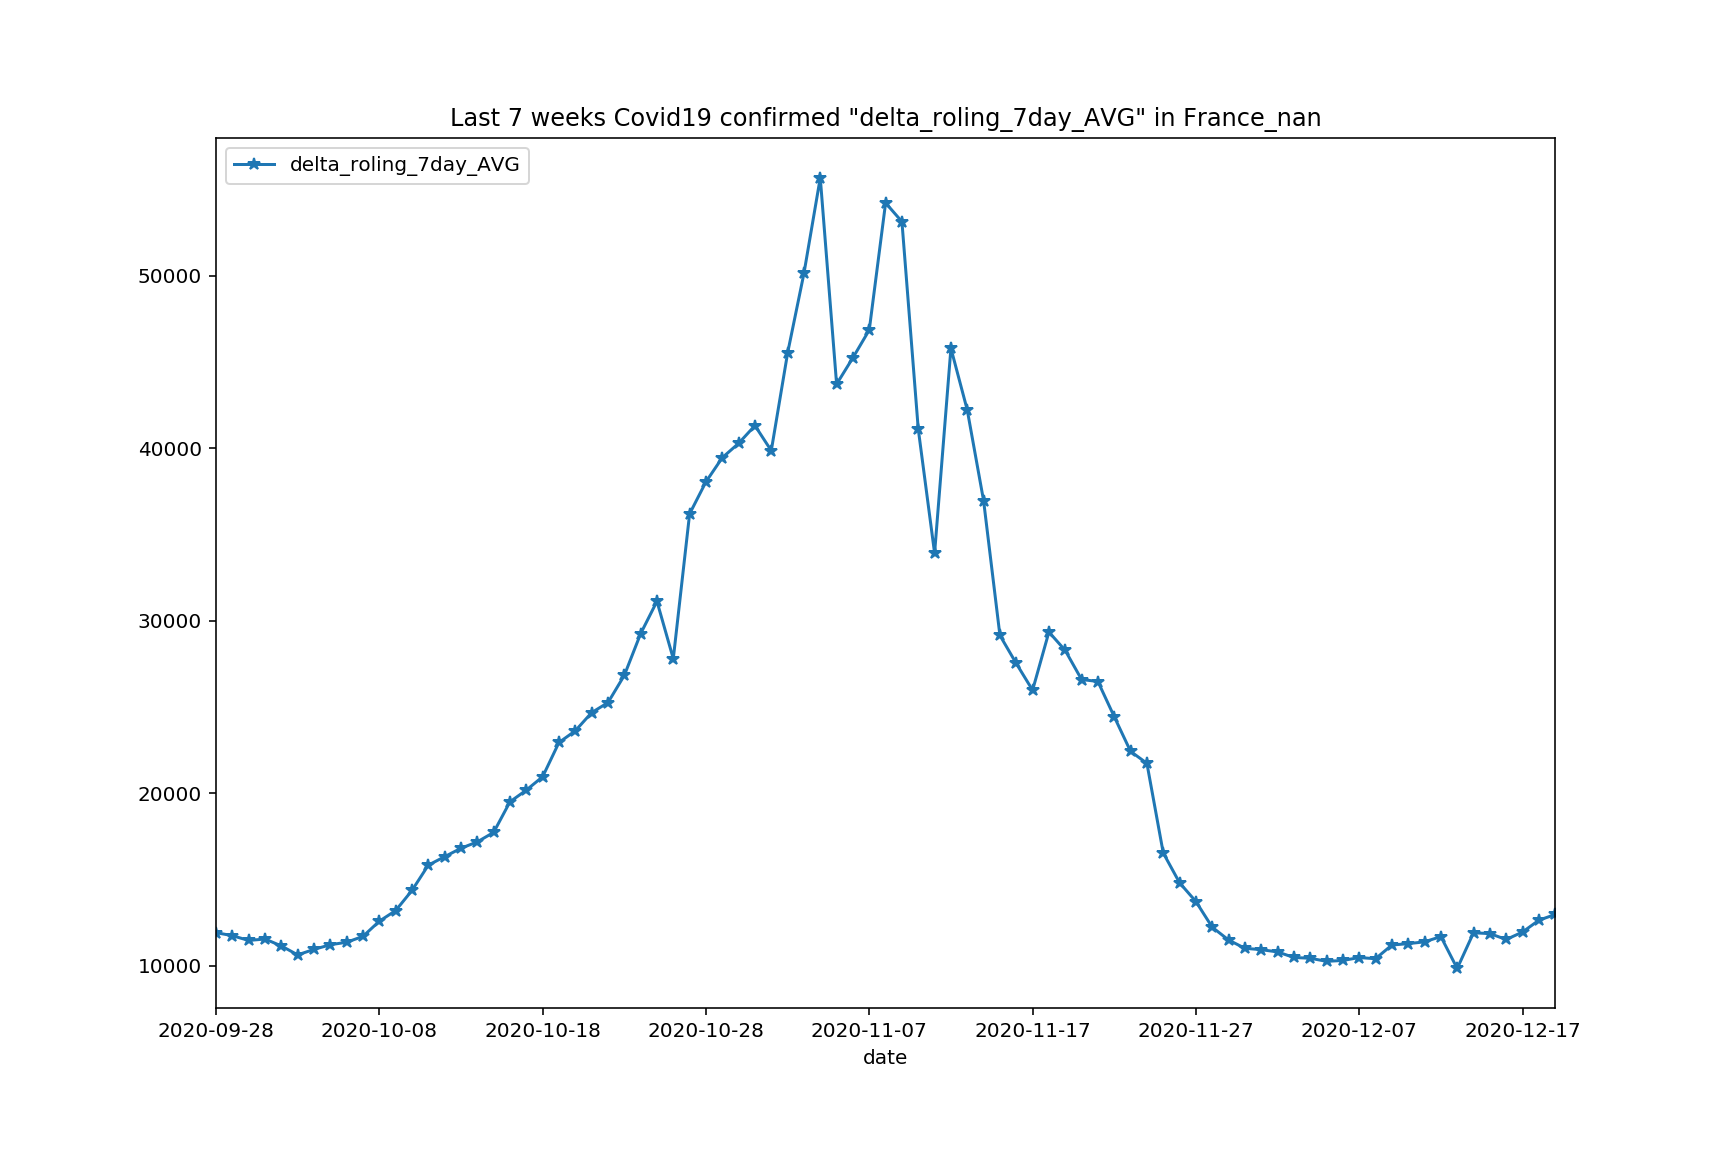

In [53]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


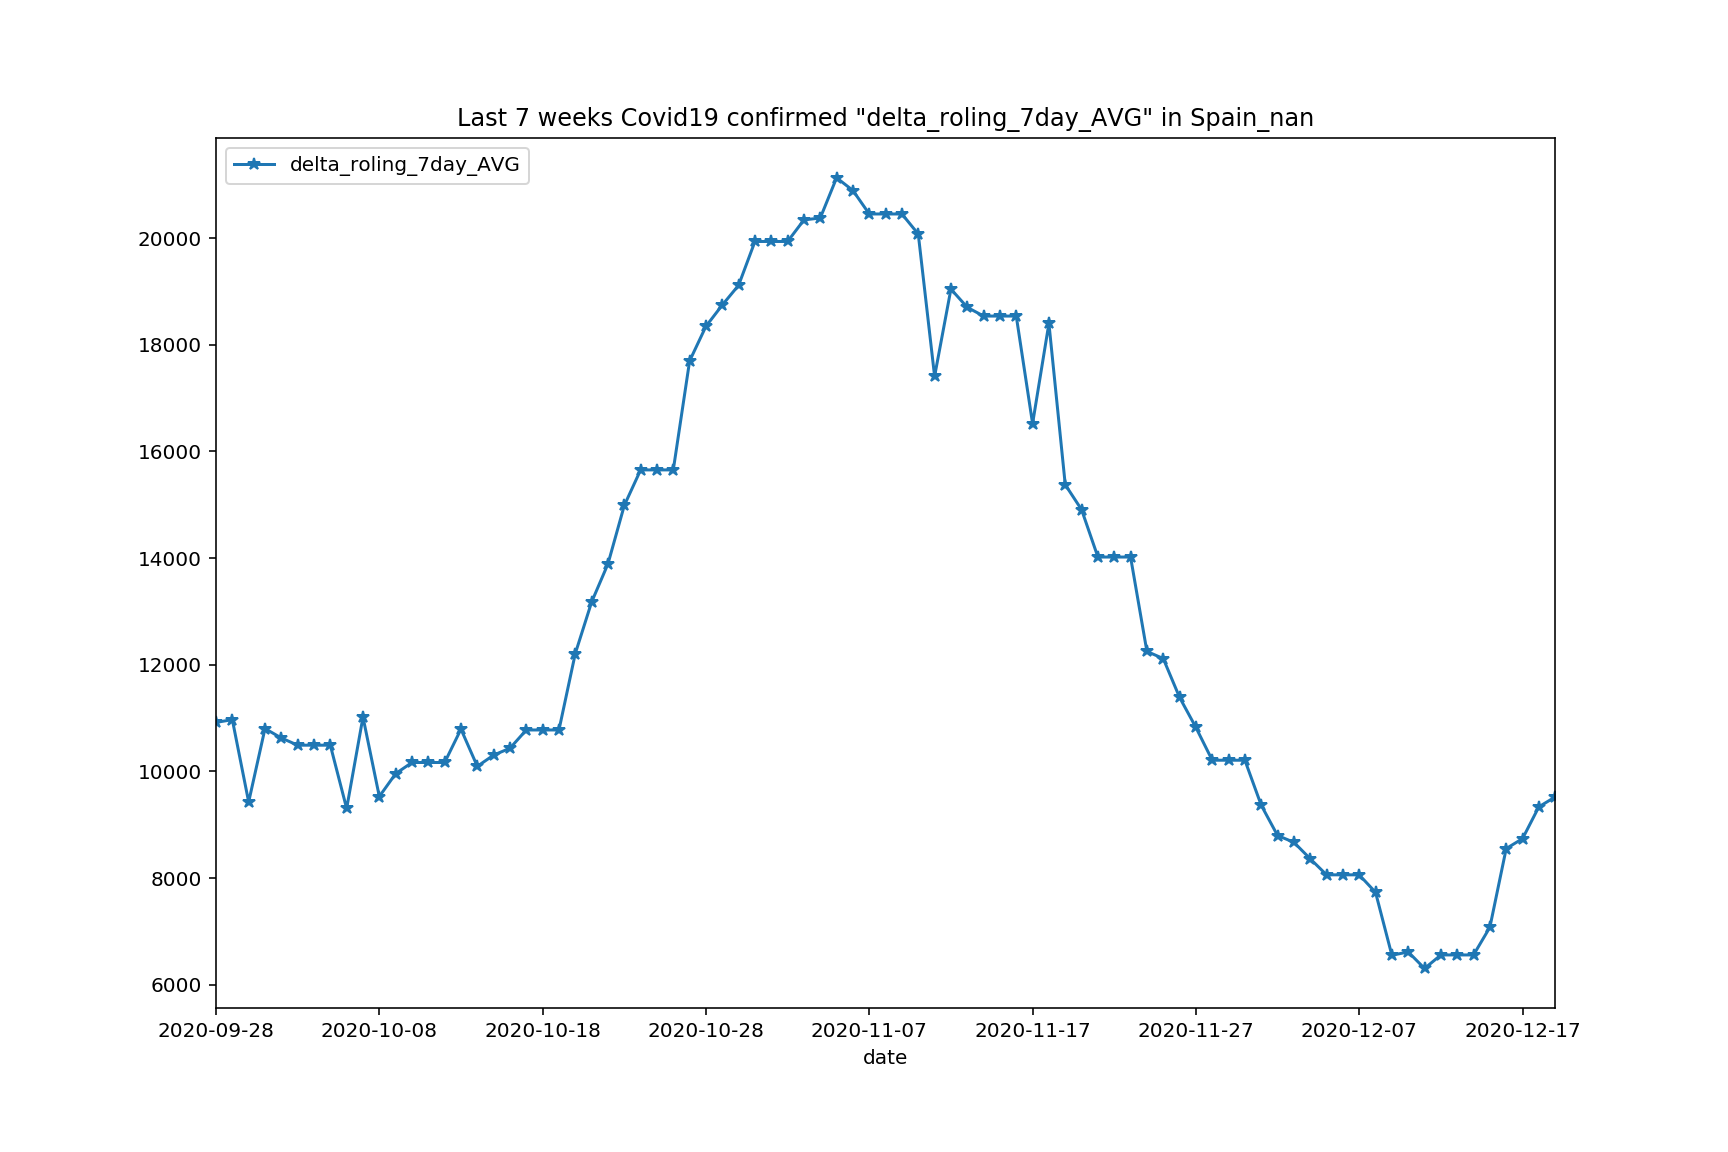

In [54]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


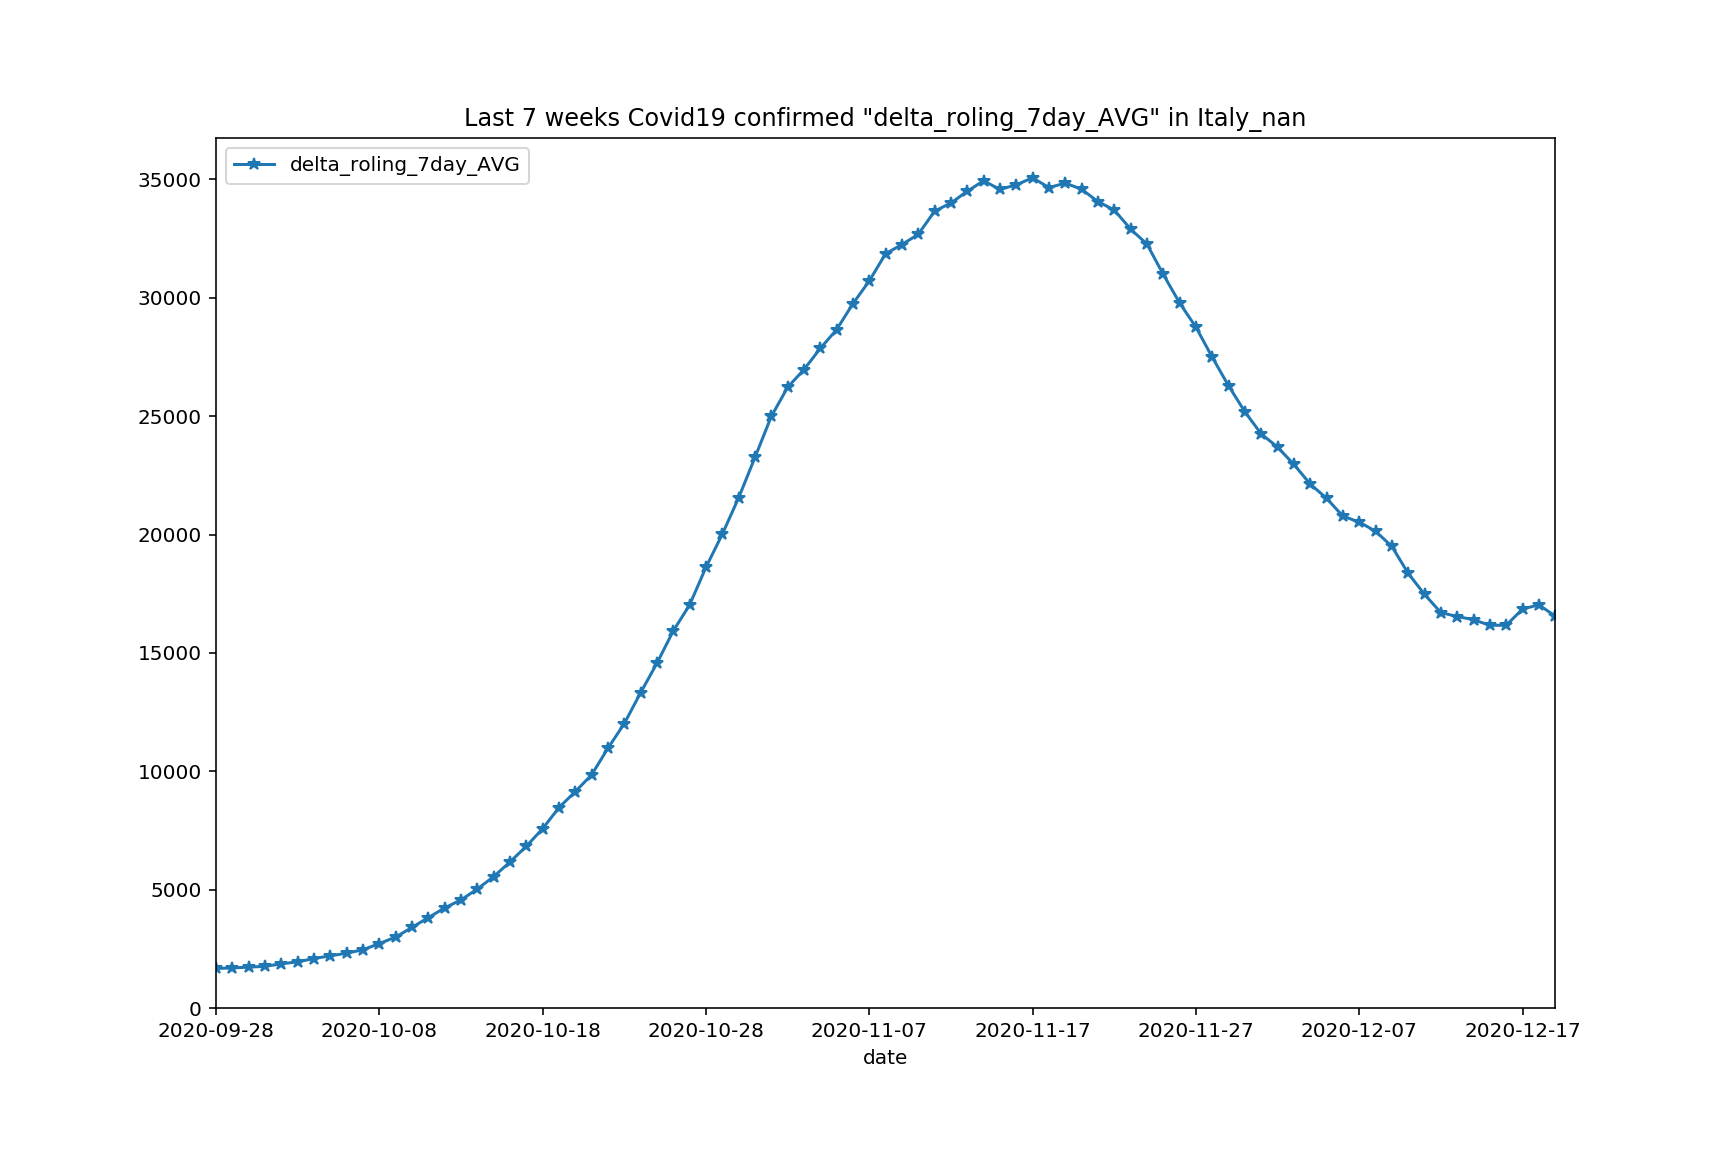

In [55]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


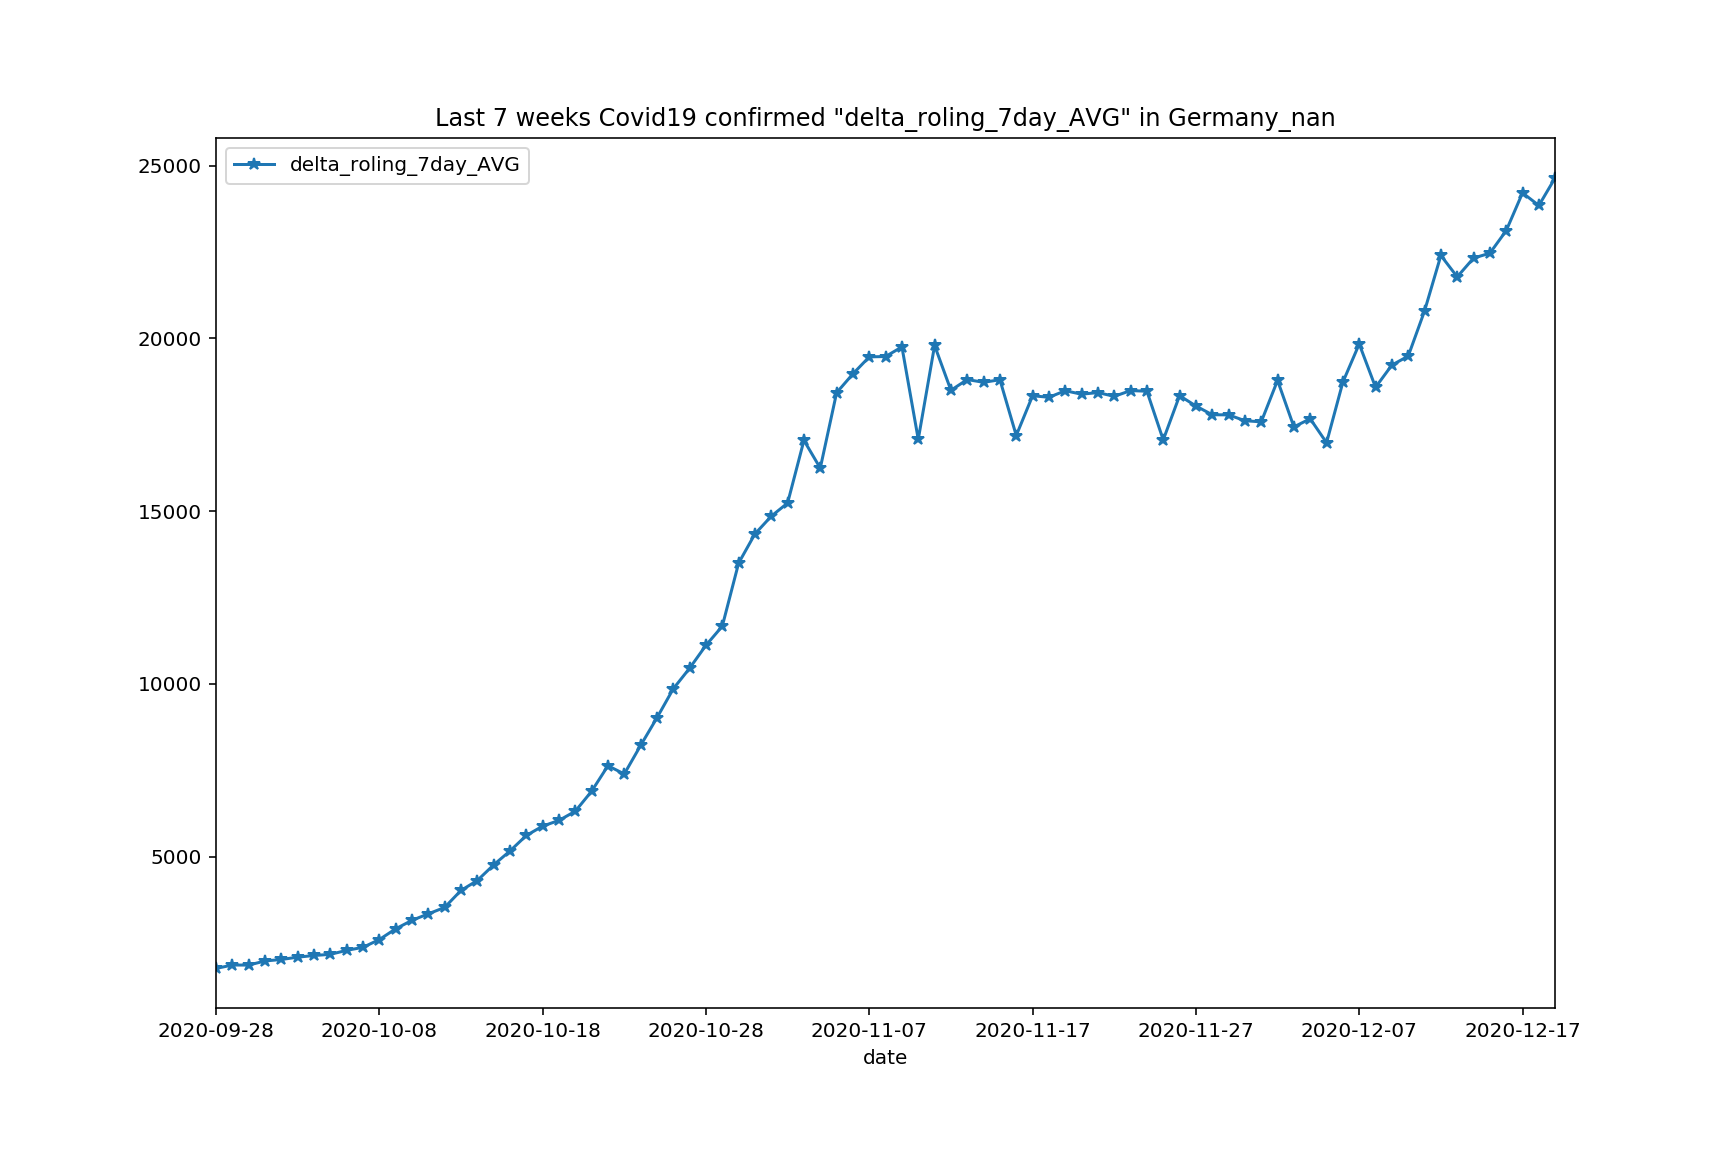

In [56]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


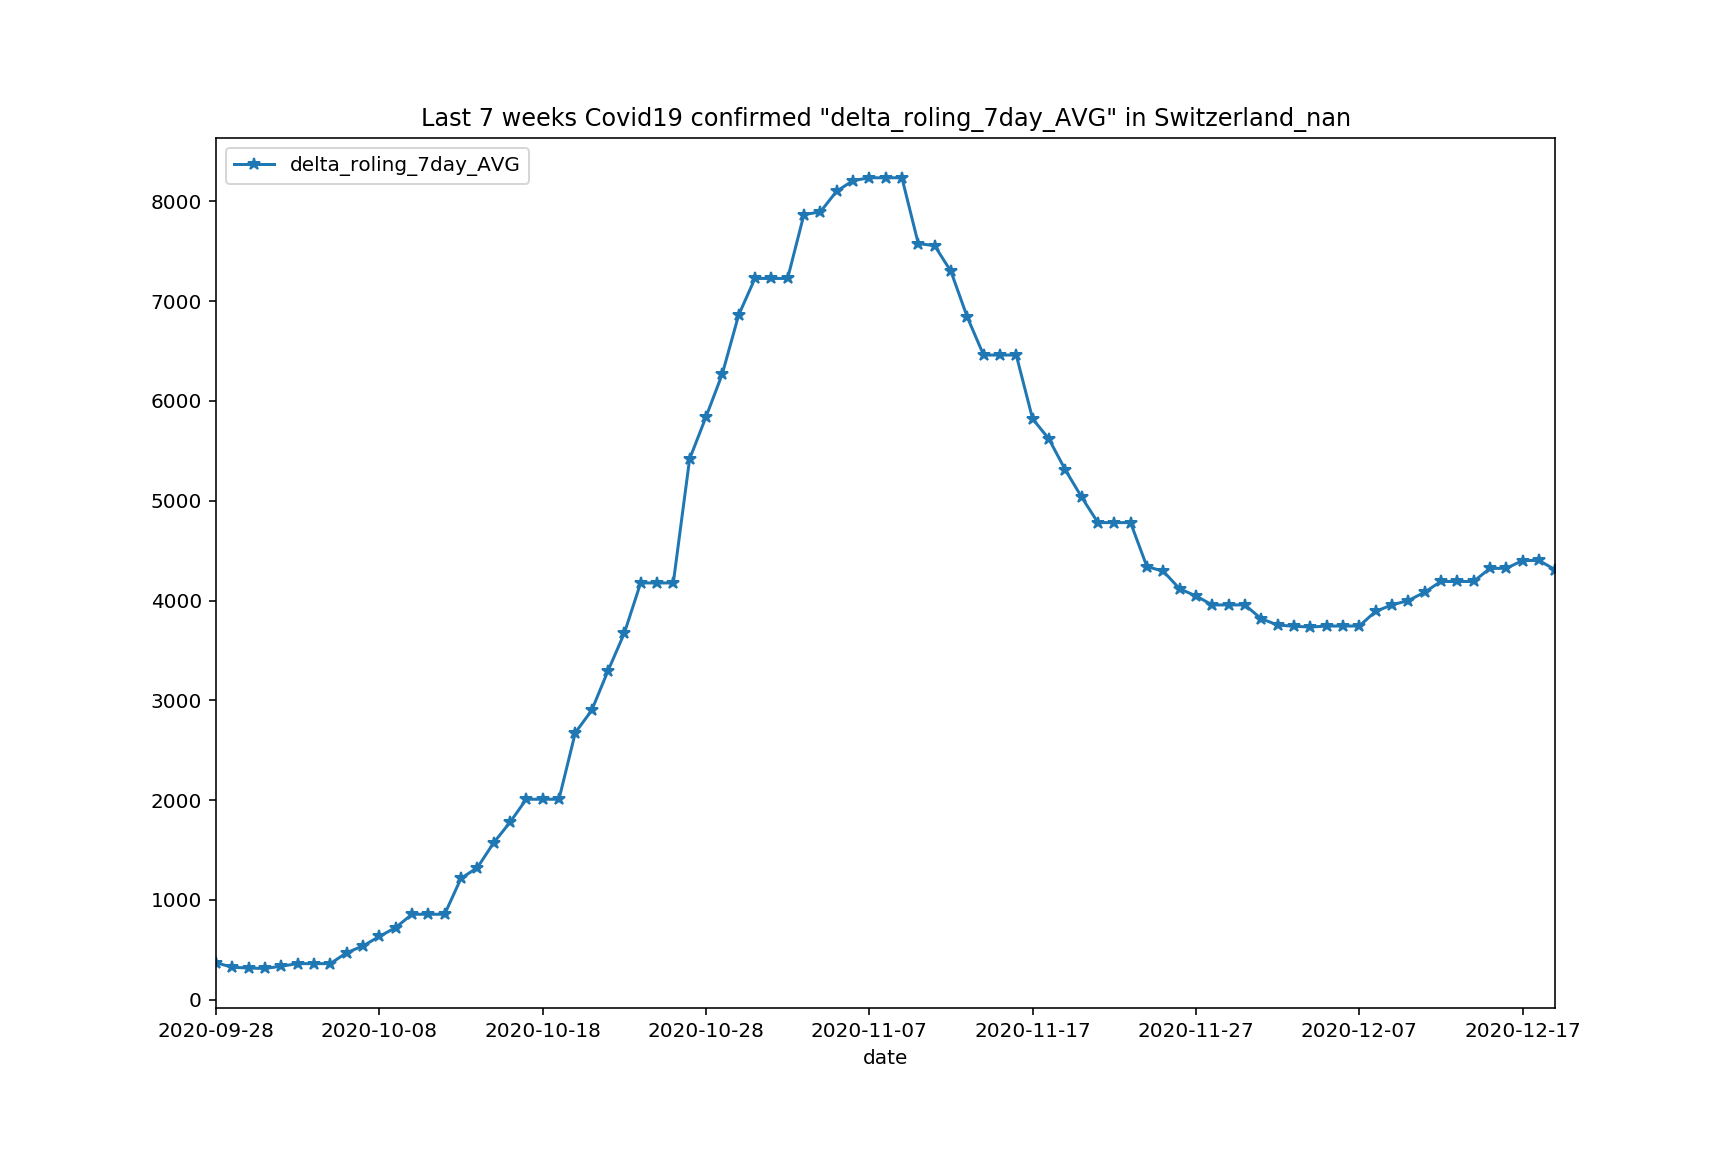

In [57]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


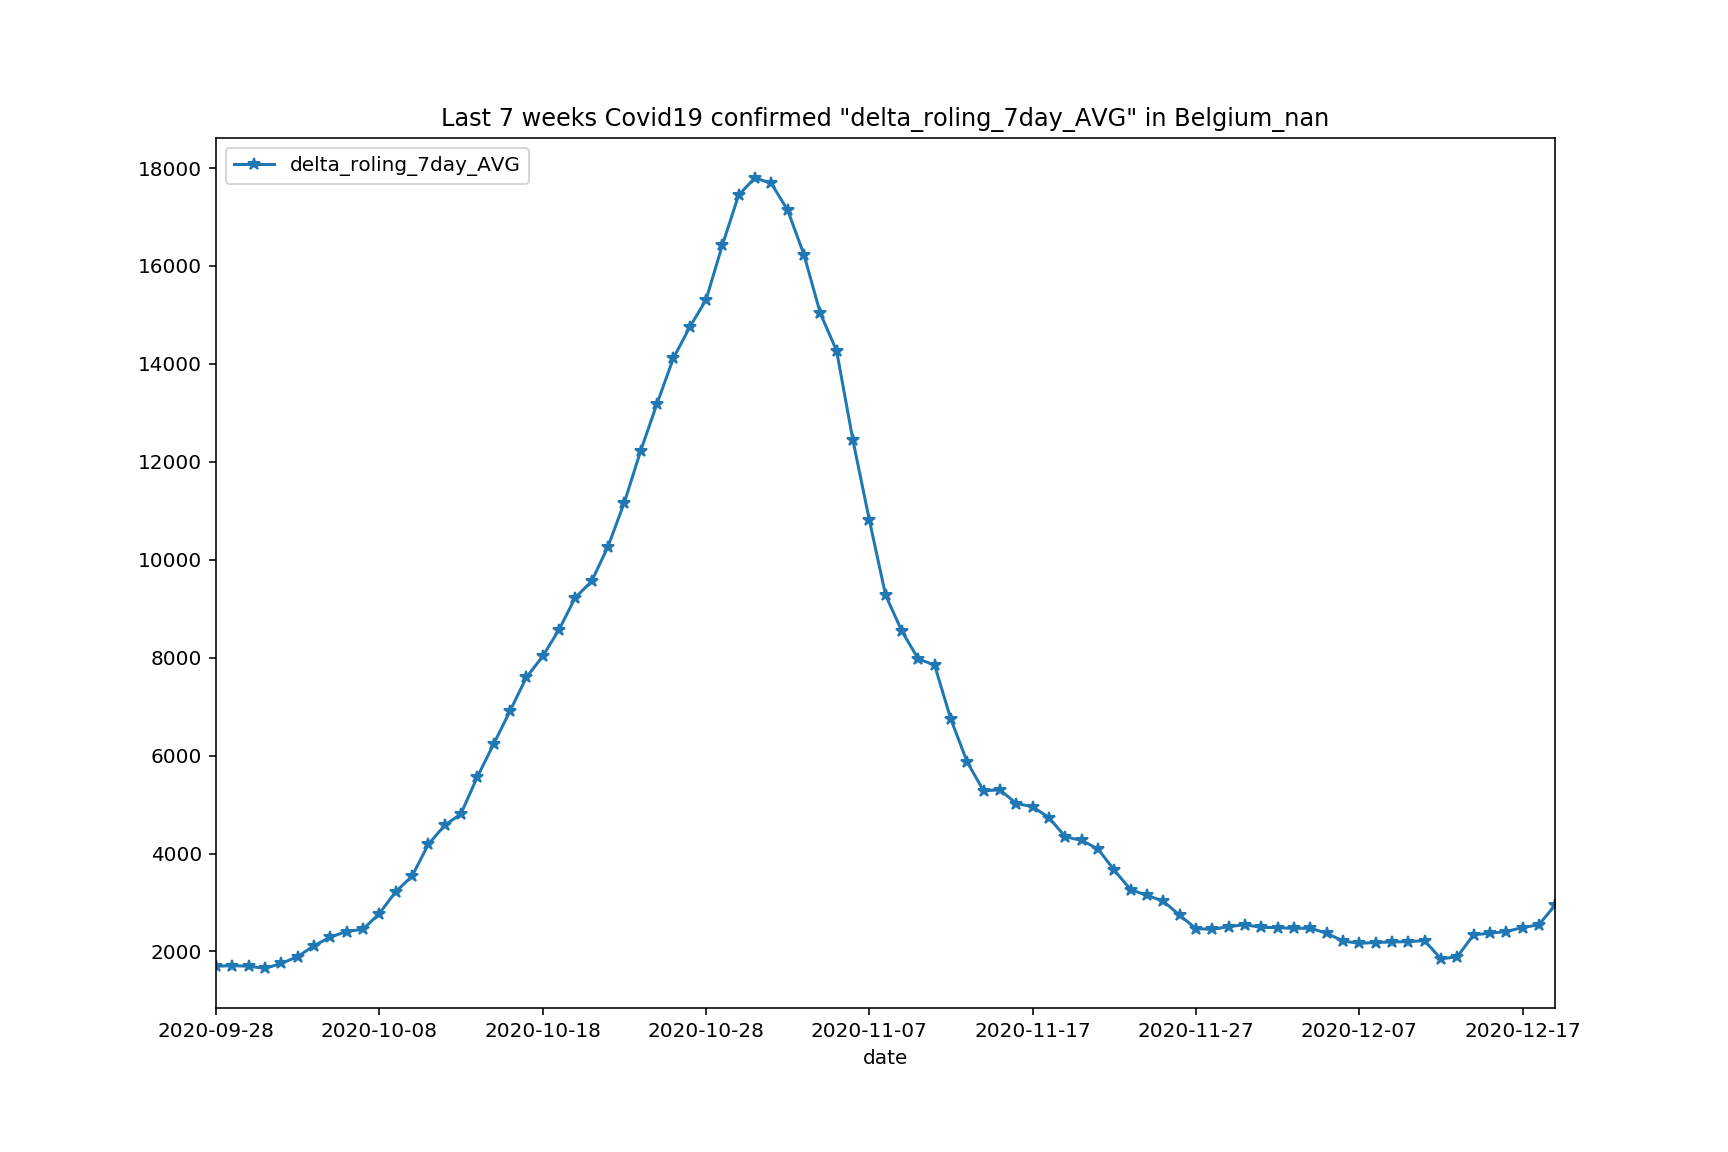

In [58]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


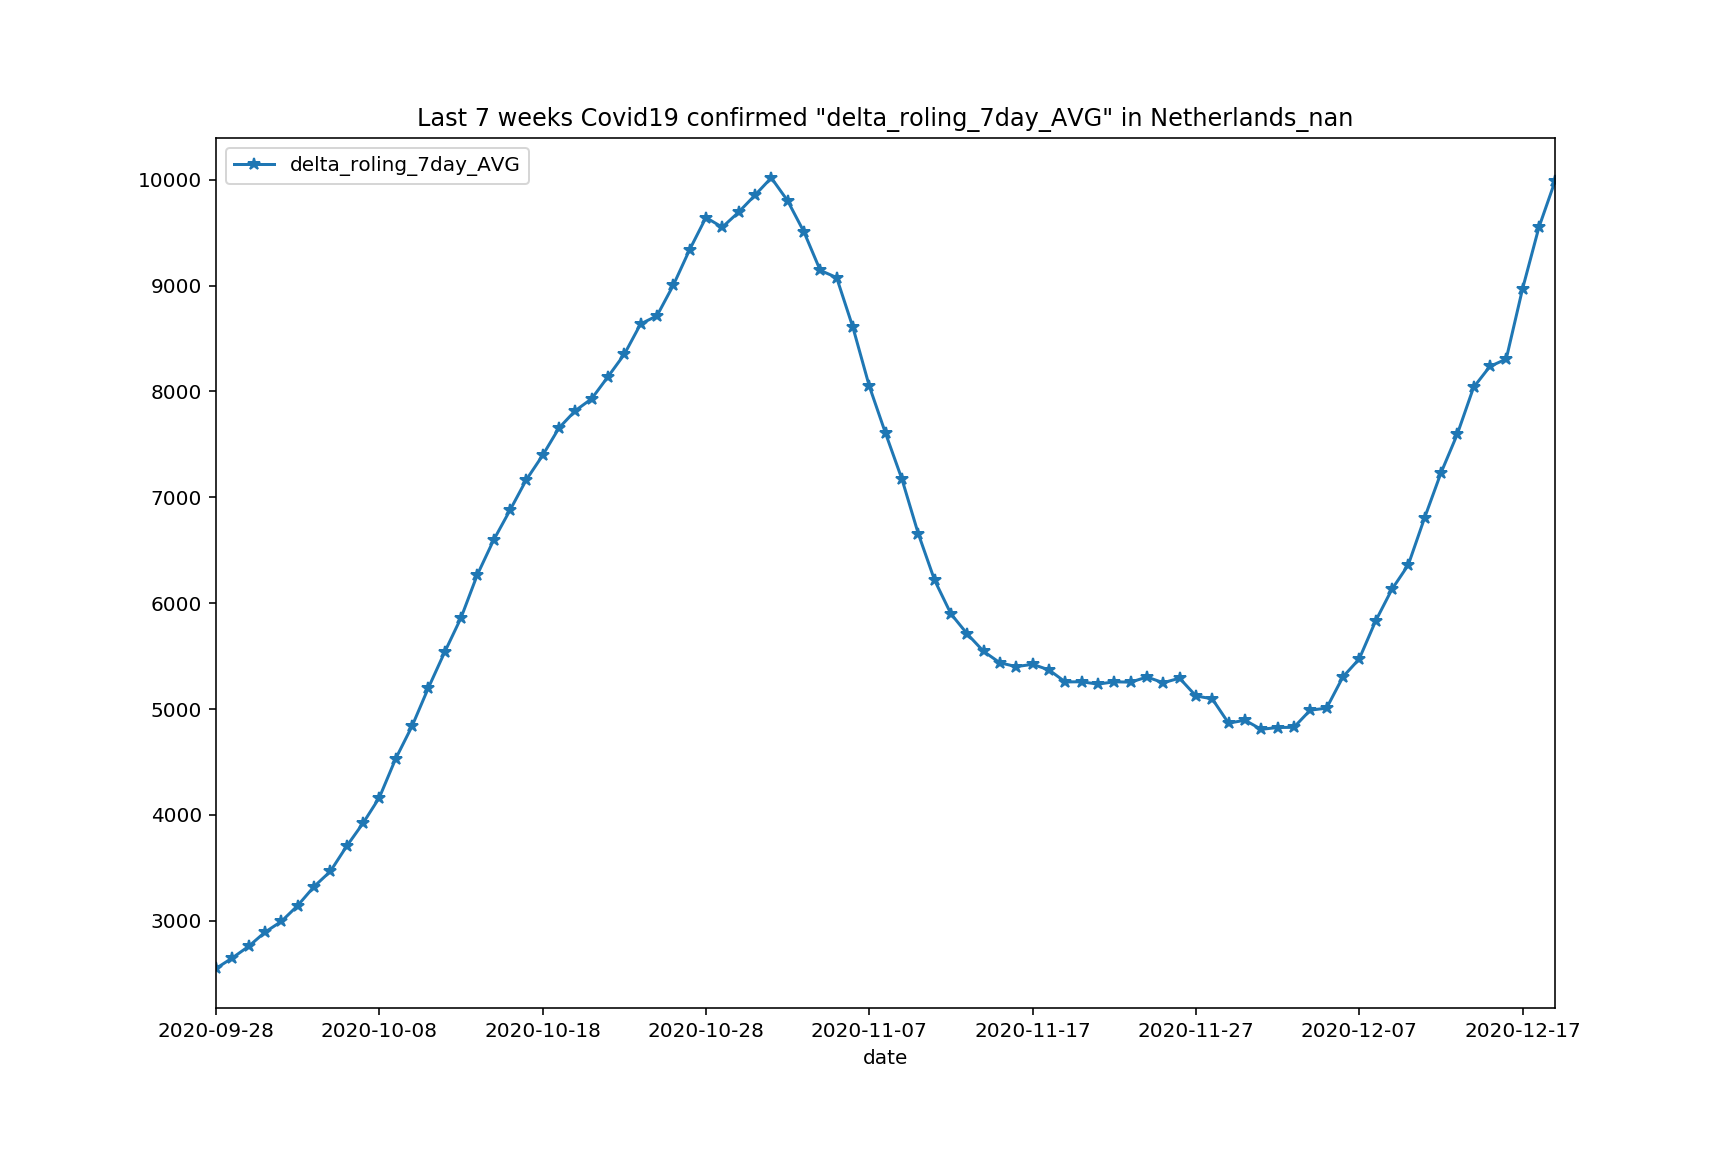

In [59]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


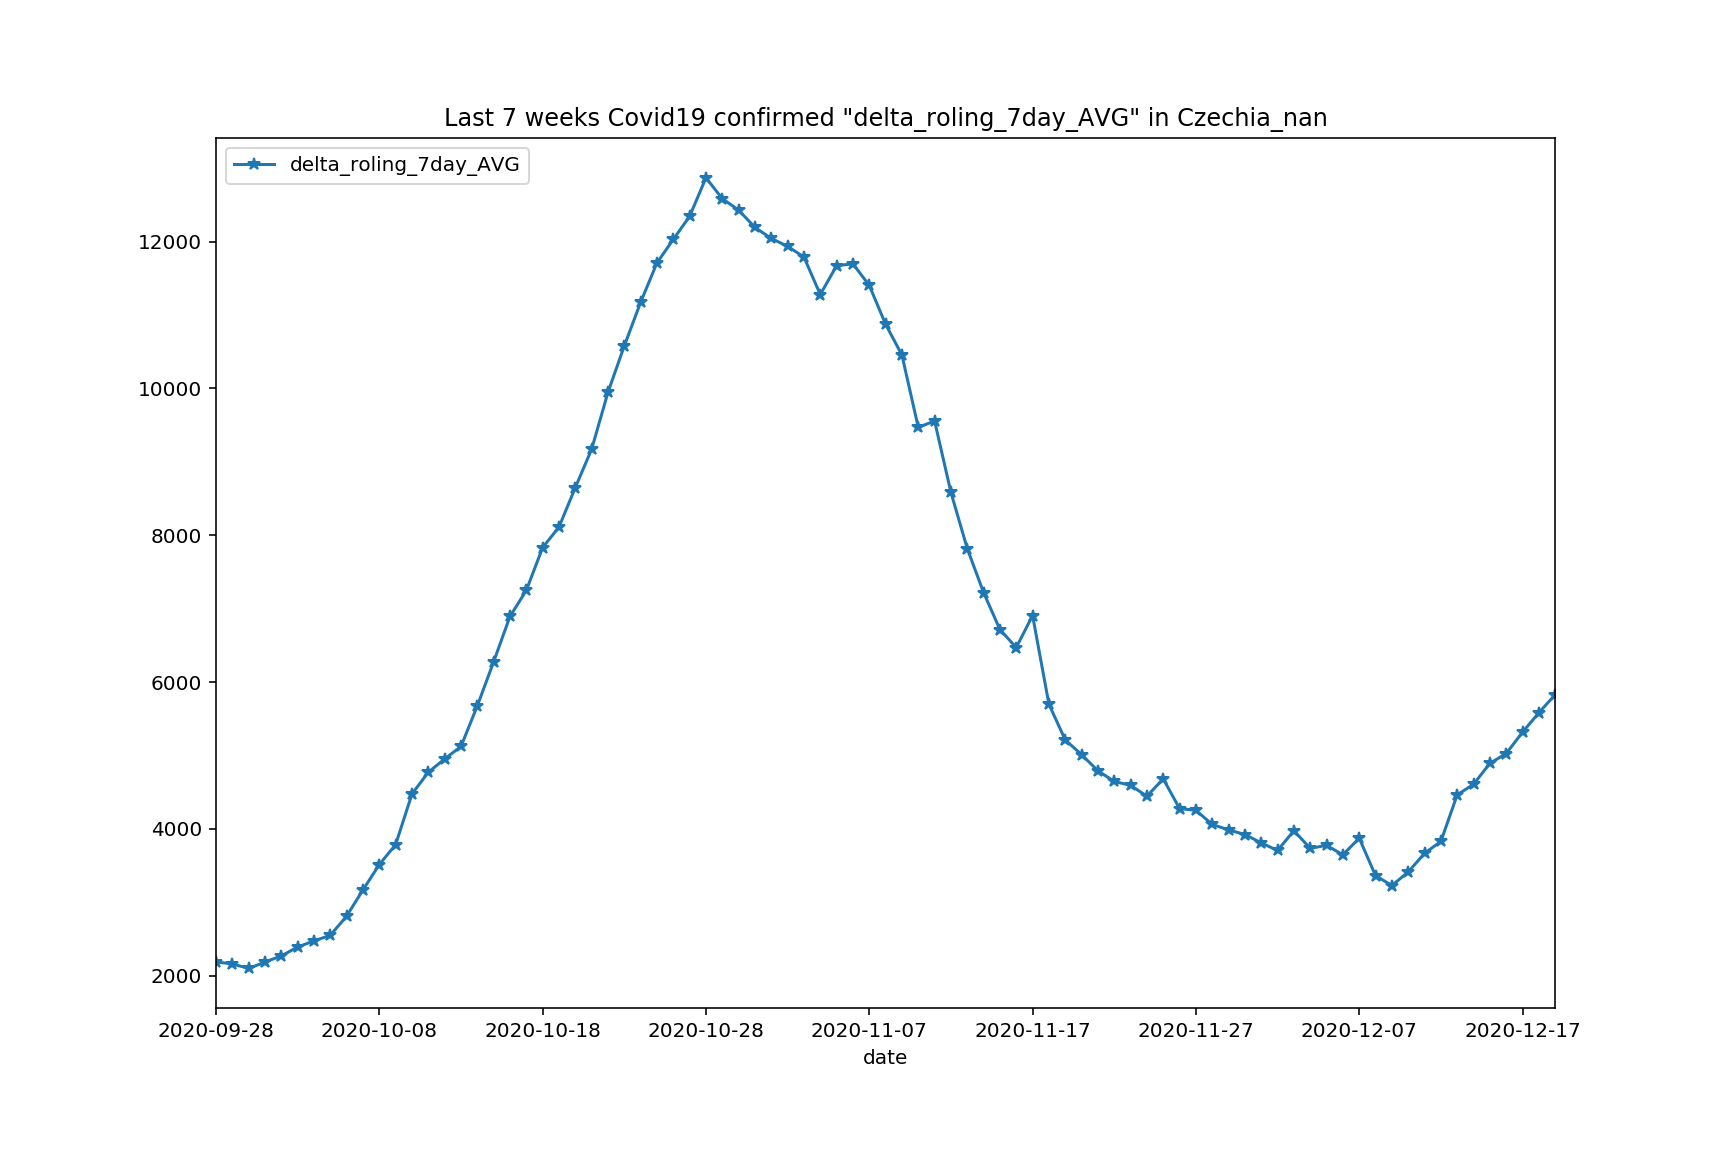

In [60]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


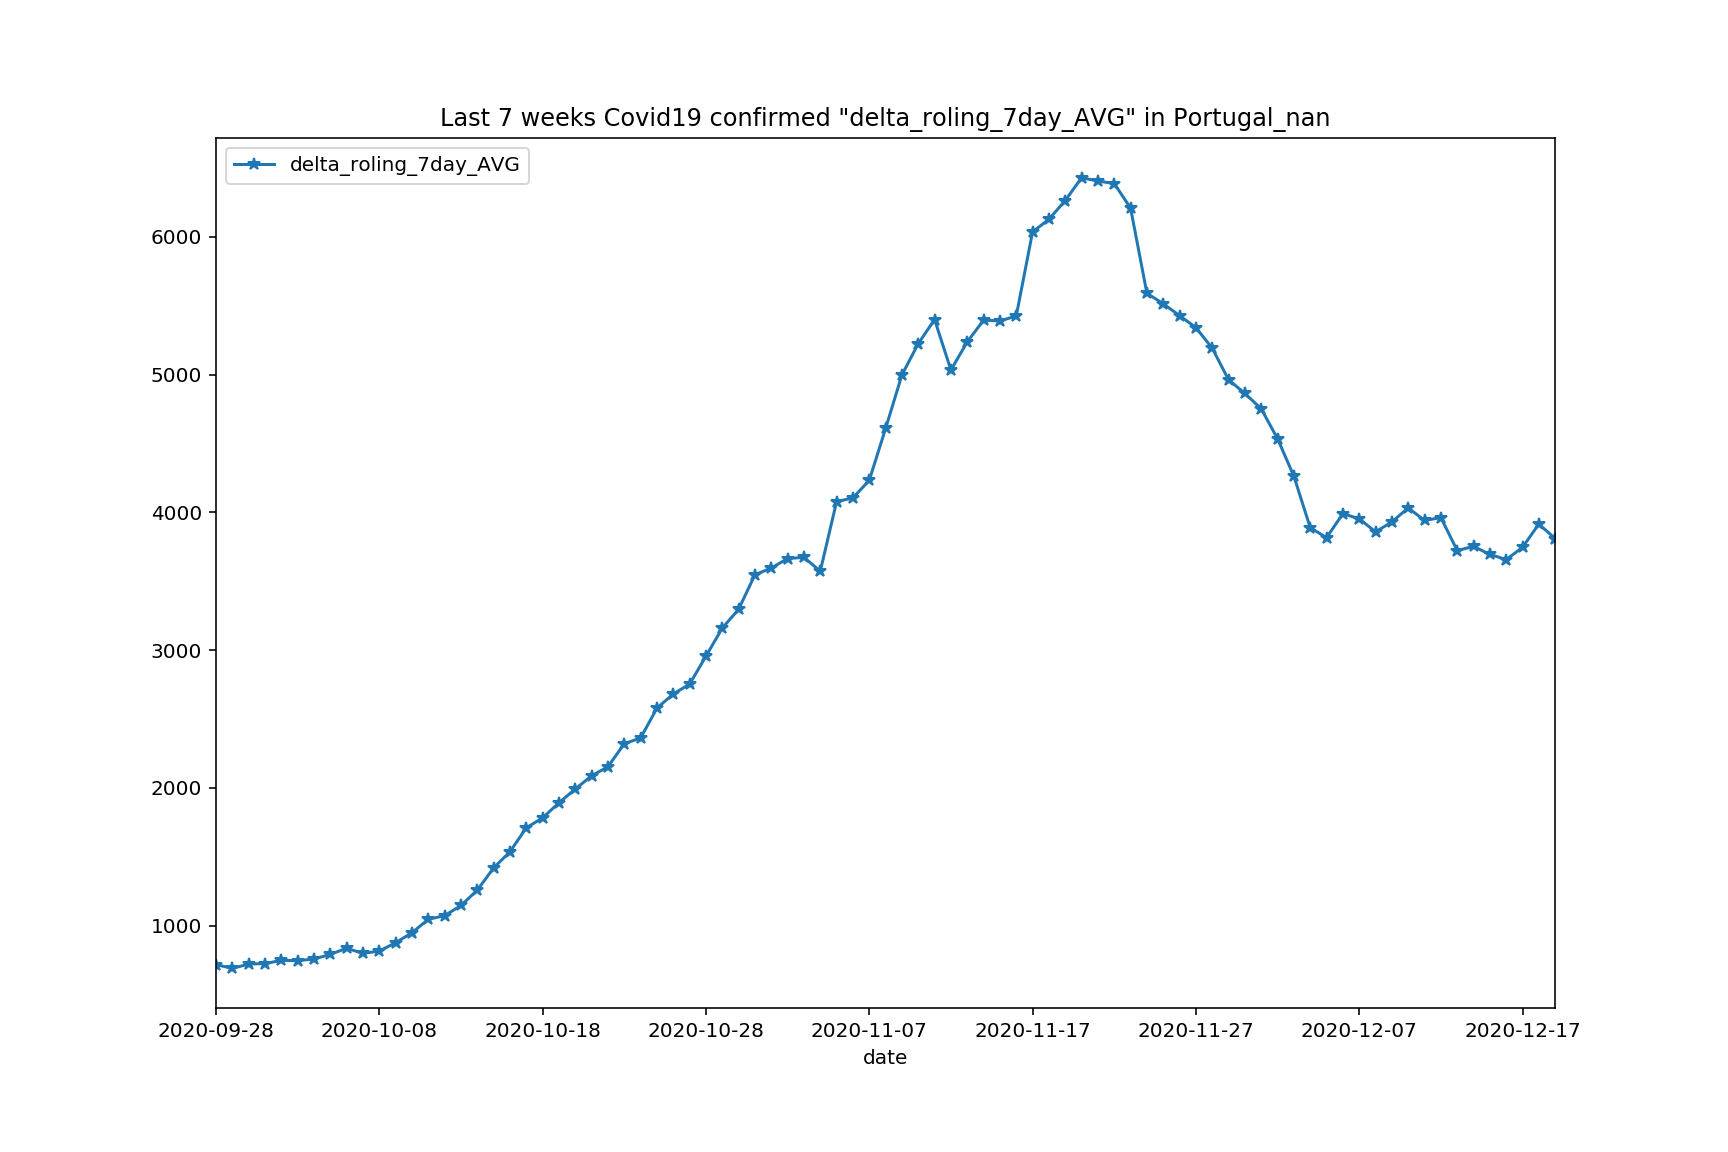

In [61]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [62]:
print("Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!")

Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!


In [63]:
exit()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
